# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [10]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [6]:
churn = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [11]:
# Checking the number of rows and columns in the training data
churn.shape

(10127, 21)

##### Observation : The dataset has 10127 rows and 21 columns

In [531]:
# let's create a copy of the data and use the copy for further processing
data = churn.copy()

### Displaying the first few rows of the dataset

In [533]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [22]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [535]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

##### Observations :
1. Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category are Object Columns.
2. ClientNum, Customer_Age, Dependent_Count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct are the integer columns
3. Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Change_Q4_Q1, Avg_Utilization_Ratio are the Columns take a floating point Integer.
4. Education_Level and Marital_Status have less than 10127 rows. Hence, they have missing values

### Checking for duplicate values

In [537]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

##### Observations : There are no duplicate values in the dataset

### Checking for missing values

In [541]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

##### Observations : 
1. Education_Level column has 15% missing values out of the total observations.
2. Marital_Status has 7.4% missing values out of the total observations.
3. No other columns have missing values
4. We will impute these values with most frequent observation after we split the data into train, validation and test sets.

### Statistical summary of the dataset

In [257]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


##### Observations:
1. Customer_Age has an average of ~46yrs with the minimum and maximum values lying between 26yrs and 73yrs
2. Dependent_Count has an average of ~2 with the minimum and maximum values lying between 0 and 5
3. Months_on_book has an average of ~36 months with the minimum and maximum values lying between 13 months and 56 months
4. Total_Relationship_Count has an average of ~4 with the minimum and maximum values lying between 1 and 6
5. Months_Inactive_12_mon has an average of 2.34 months with the minimum and maximum values lying between 0 months and 6 months
6. Contacts_Count_12_mon has an average of 2.46 months with the minimum and maximum values lying between 0 months and 6 months
7. Credit_Limit has an average of \\$8631.96 with the minimum and maximum values lying between \\$1438.30 and \\$34516.00
8. Total_Revolving_Bal has an average of \\$1162.81 with the minimum and maximum values lying between \\$0 and \\$2517.00
9. Avg_Open_To_Buy has an average of \\$7469.14 with the minimum and maximum values lying between \\$3 and \\$34516.00
10. Total_Amt_Chng_Q4_Q1 has an average of 0.76 with the minimum and maximum values lying between 0 and 3.39
11. Total_Trans_Amt has an average of \\$4404.09 with the minimum and maximum values lying between \\$510.00 and \\$18484.00
12. Total_Trans_Ct has an average of ~65 with the minimum and maximum values lying between 10 and 139
13. Total_Ct_Chng_Q4_Q1 has an average of 0.712 with the minimum and maximum values lying between 0 and 3.7
14. Avg_Utilization_Ratio has an average of 0.275 with the minimum and maximum values lying between 0 and 0.99

In [71]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


##### Observations:
1. Attrition_Flag takes only 2 values. 84% of Customers are 'Existing_Customer'
2. Gender takes only 2 values. 53% of Customers are 'Females'
3. Income_Category takes 6 values. 35% of Customers draw 'Less than 40K'
4. Card_Category takes 4 values. 93% of Customers hold 'Blue' card
5. Education_Level has 15% values missing. Out of the available data, 36% of Customers were 'Graduates'
6. Marital_Status has 7.4% values missing. Out of the available data, 46% of Customers were 'Married'

In [544]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

##### Observations:
1. The 'abc' category in Income_Category should be replaced as 'NaN'
2. These 'Unknown' or missing categories will be imputed with the most frequent value after the data split to avoid data leakage
3. Changing all the above 'Obect' datatype columns to 'Category'

In [546]:
data['Income_Category'].replace("abc", np.nan, inplace=True)

In [548]:
data['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [552]:
#changing the datatype from Object to Category
categorical_col = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
for colname in categorical_col:
    data[colname] = data[colname].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           9015 non-null   category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [554]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [556]:
## Encoding Existing and Attrited customers in Target variable to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [558]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [98]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [100]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [102]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [437]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(9, 7))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

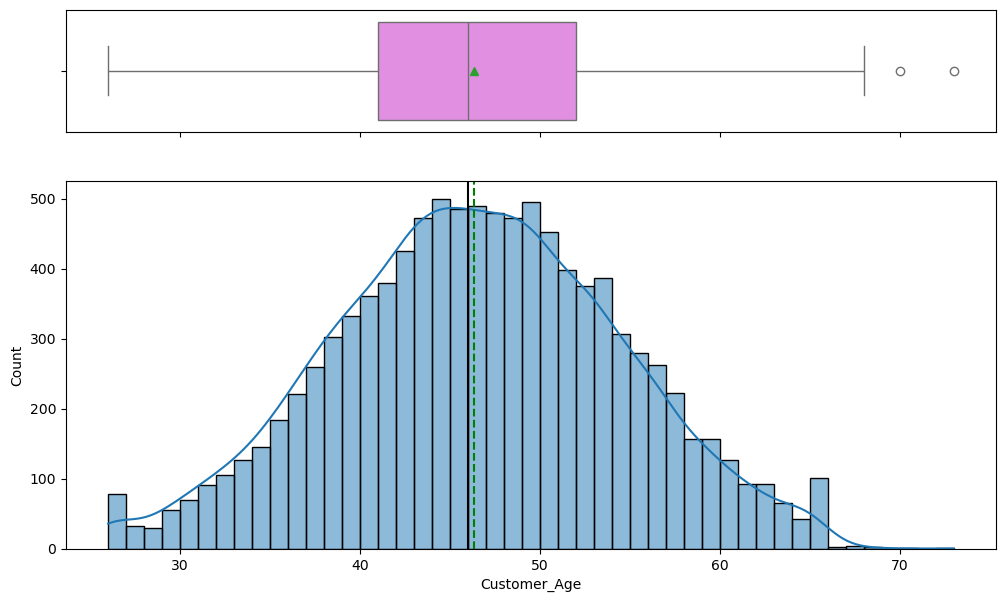

In [108]:
histogram_boxplot(data, "Customer_Age", kde=True)

###### Observations: 
1. Customer_Age follows a slightly right skewed distribution with a couple of outliers
2. The outliers are due to few customers being over 70 yrs.
3. 25th Percentile (Q1): First Quartile is at 41yrs, indicating that one fourth of the customers are under 42yrs of age
4. 50th Percentile (Q2): Median is at 46yrs, indicating that half of the customers are under 47yrs of age
5. 75th Percentile (Q3): Third Quartile is at 52yrs, indicating that three fourth of the customers are under 53yrs of age
6. InterQuartile Range (IQR) : IQR is 11yrs spanning from 41-52yrs

`Credit_Limit`

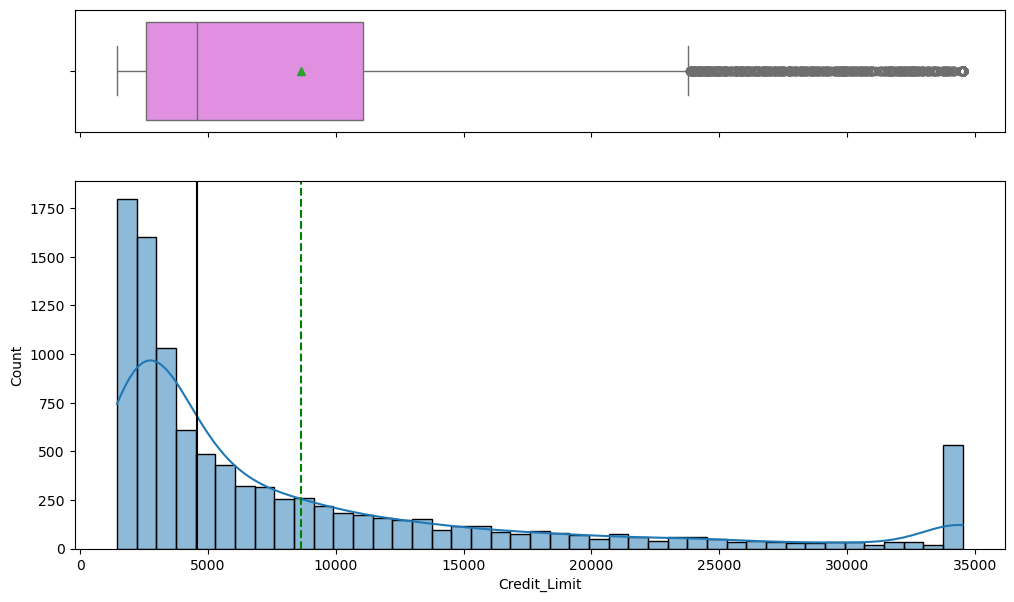

In [246]:
histogram_boxplot(data, "Credit_Limit", kde=True)

###### Observations: 
1. Credit_Limit follows a very right skewed distribution with a lot of outliers
2. The outliers are due to lot of customers having a credit limit ~\\$34000 which is much over the credit limit of most of the customers.
3. 25th Percentile (Q1): First Quartile is at \\$2500, indicating that one fourth of the customers have a credit limit \\$2500 or below
4. 50th Percentile (Q2): Median is at \\$4500, indicating that half of the customers have a credit limit \\$4500 or below. 
5. 75th Percentile (Q3): Third Quartile is at \\$12000, indicating that three fourth of the customers have a credit limit \\$12000 or below
6. InterQuartile Range (IQR) : IQR is \\$9500 spanning from \\$4500 to \\$12000

`Months_on_Book`

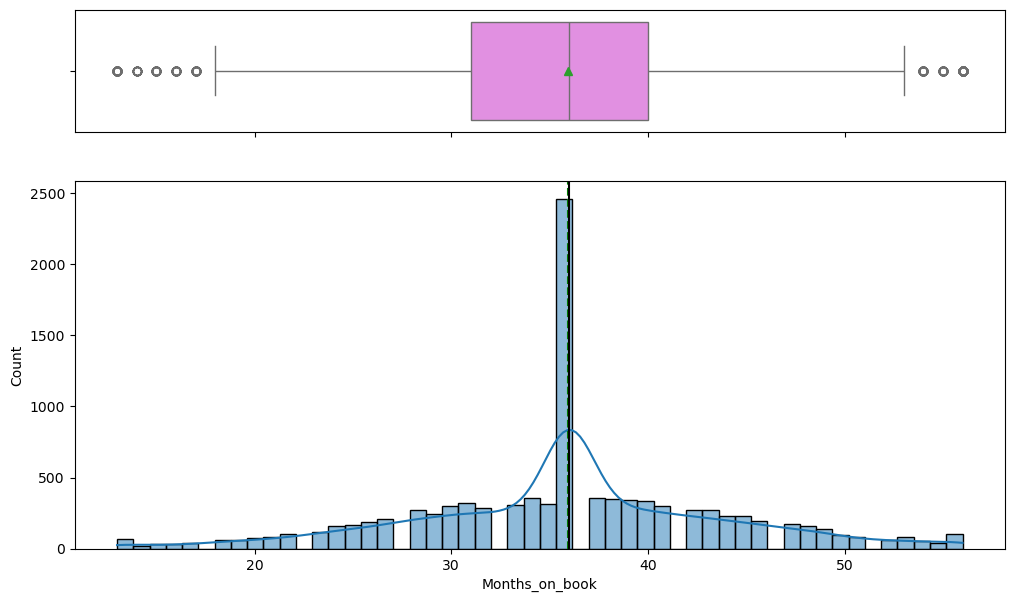

In [116]:
histogram_boxplot(data, "Months_on_book", kde=True)

###### Observations: 
1. Months_on_Book follows a normal distribution with a few outliers
2. Most customers have been with the bank fir 31 to 40 months, with the median at 35 months
3. 25th Percentile (Q1): First Quartile is at 31 months, indicating that one fourth of the customers have been with the company for 31 or less months
4. 50th Percentile (Q2): Median is at 35 months, indicating that half of the customers have been with the company for 35 or less months
5. 75th Percentile (Q3): Third Quartile is at 40 months, indicating that three fourth of the customers have been with the company for 40 or less months
6. InterQuartile Range (IQR) : IQR is 9 months spanning from 31-40 months

`Total_Revolving_Bal`

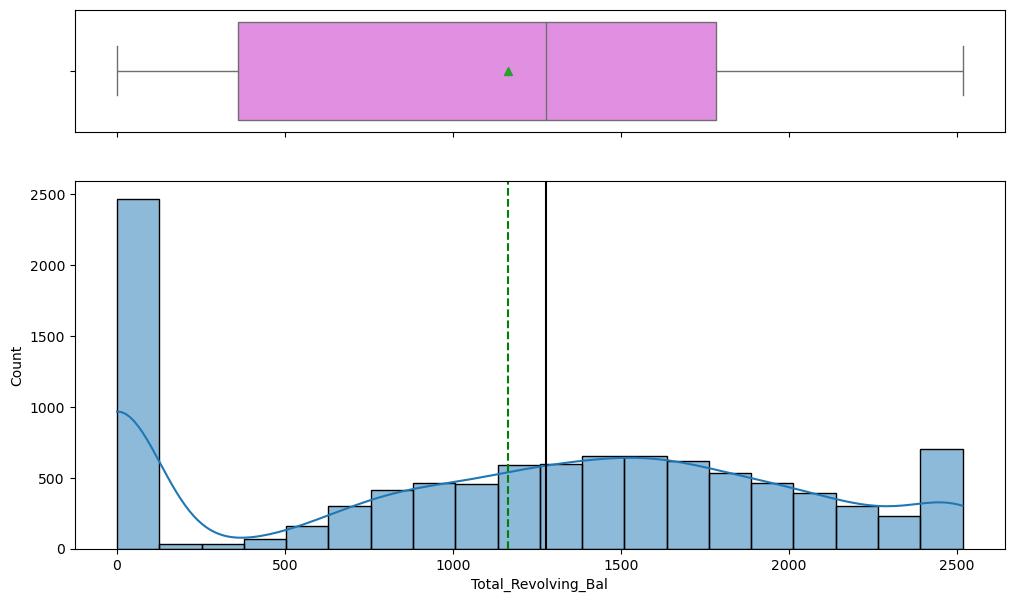

In [122]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

###### Observations: 
1. Total_Revolving_Bal follows a bimodal distribution with no outliers
2. Almost 25% of customers have 0 revolving balance. Remaining 75% of the data follows normal distribution
3. 25th Percentile (Q1): First Quartile is at \\$375, indicating that one fourth of the customers maintain a revolving balance less than or equal to \\$375.
4. 50th Percentile (Q2): Median is at \\$1275, indicating that half of the customers maintain a revolving balance less than or equal to \\$1275.
5. 75th Percentile (Q3): Third Quartile is at \\$1775, indicating that three fourth of the customers maintain a revolving balance less than or equal to \\$1775.
6. InterQuartile Range (IQR) : IQR is \\$1400 spanning from \\$375 to \\$1775

`Avg_Open_To_Buy`

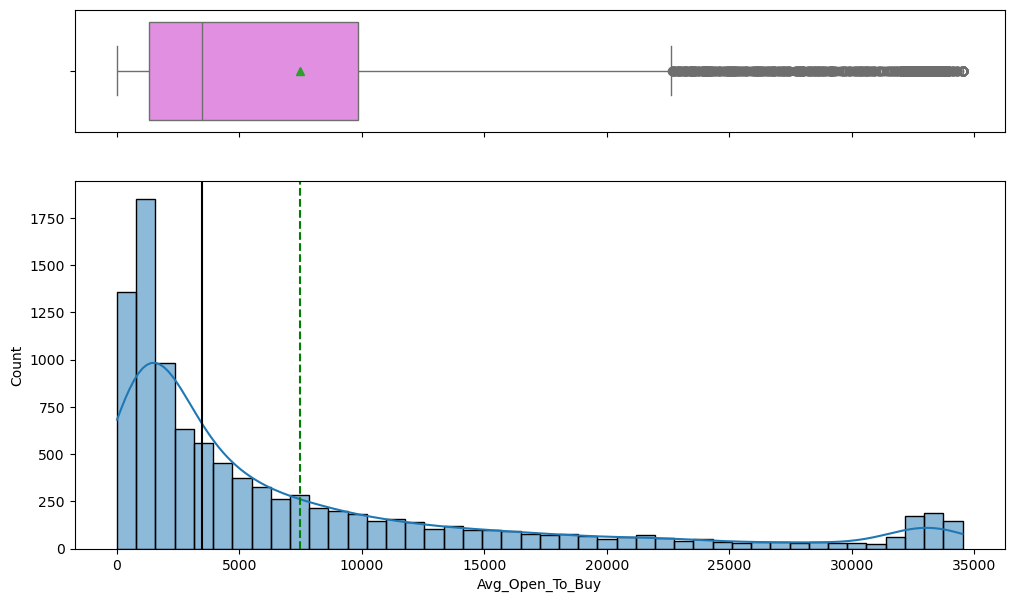

In [125]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

In [224]:
data['Attrition_Flag'].groupby(data["Avg_Open_To_Buy"]>23000).count()

Avg_Open_To_Buy
False    9186
True      941
Name: Attrition_Flag, dtype: int64

###### Observations: 
1. Avg_open_to_Buy follows a right skewed distribution with lot of outliers
2. Nearly 2000 customers have a Avg_Open_To_Buy value of ~\\$1400 and ~941 customers have AvgOpen_To_Buy greater than ~\\$23000. The huge number of data points in the wide range causes outliers and skewness in data
3. 25th Percentile (Q1): First Quartile is at \\$1250, indicating that one fourth of the customers have Avg_Open_To_Buy value less than or equal to \\$1250.
4. 50th Percentile (Q2): Median is at \\$3500, indicating that half of the customers have Avg_Open_To_Buy less than or equal to \\$3500.
5. 75th Percentile (Q3): Third Quartile is at \\$10000, indicating that three fourth of the customers have Avg_Open_To_Buy less than or equal to \\$10000.
6. InterQuartile Range (IQR) : IQR is \\$8750 spanning from \\$1250 to \\$10000

`Total_Trans_Ct`

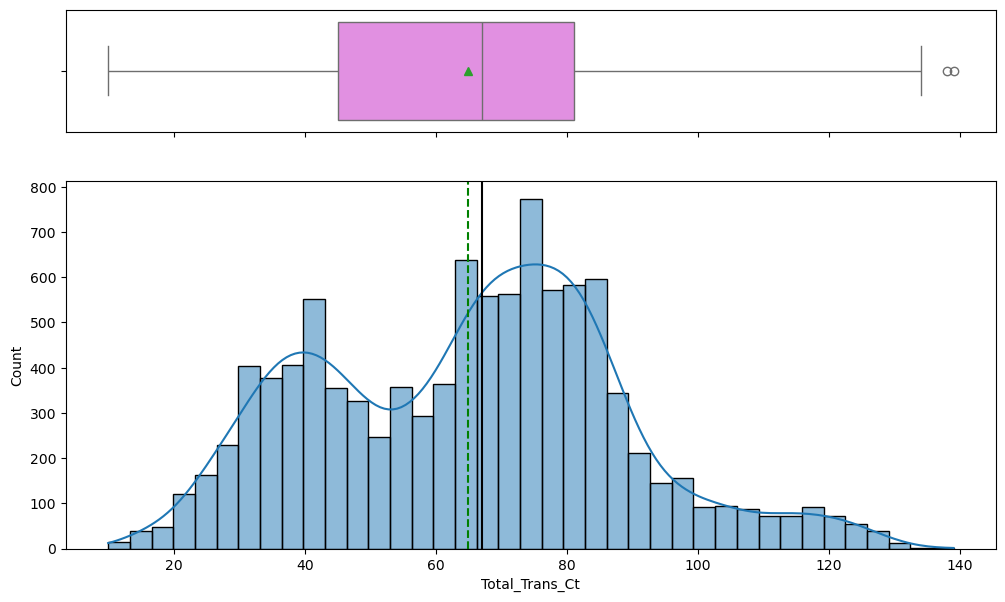

In [227]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

###### Observations: 
1. Total_Trans_Ct shows a bimodal distribution with a couple of outliers
2. Most of the customers make nearly 75 transactions in a year
3. 25th Percentile (Q1): First Quartile is at 45, indicating that one fourth of the customers make less than or equal to 45 transactions in a year
4. 50th Percentile (Q2): Median is at 67, indicating that half of the customers make less than or equal to 67 transactions in a year.
5. 75th Percentile (Q3): Third Quartile is at 82, indicating that three fourth of the customers make less than or equal to 82 transactions in a  year.
6. InterQuartile Range (IQR) : IQR is 37 spanning from 45 to 82

`Total_Ct_Chng_Q4_Q1`

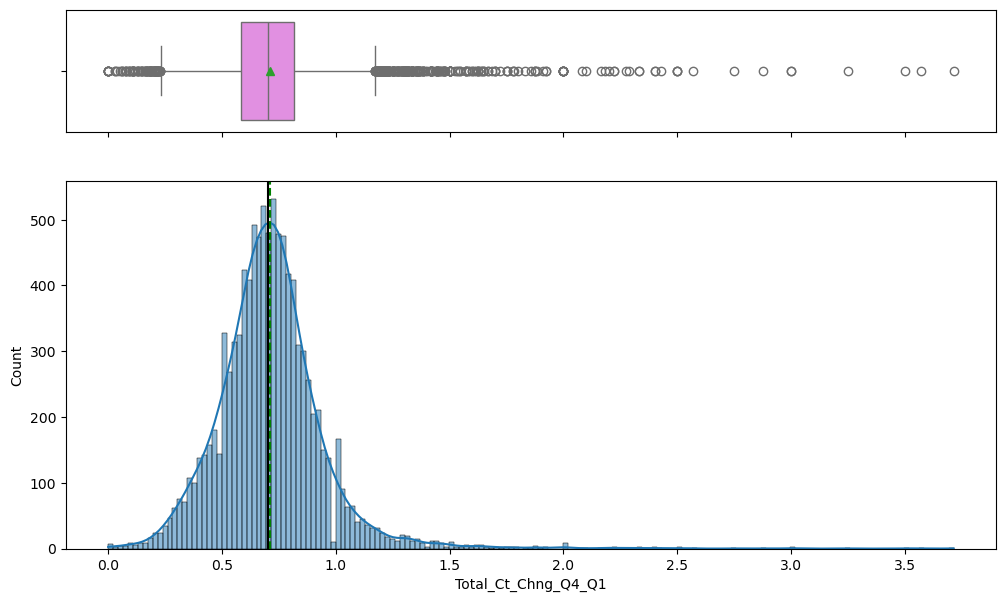

In [131]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

###### Observations: 
1. Total_Ct_Chng_Q4_Q1 follows a normal distribution with lot of outliers
2. Outliers are present on both sides (<0.2 counts and >1.2 counts)
3. 25th Percentile (Q1): First Quartile is at 0.6
4. 50th Percentile (Q2): Median is at 0.7
5. 75th Percentile (Q3): Third Quartile is at 0.8
6. InterQuartile Range (IQR) : IQR is 0.2 spanning from 0.6 to 0.8

`Total_Trans_Amt`

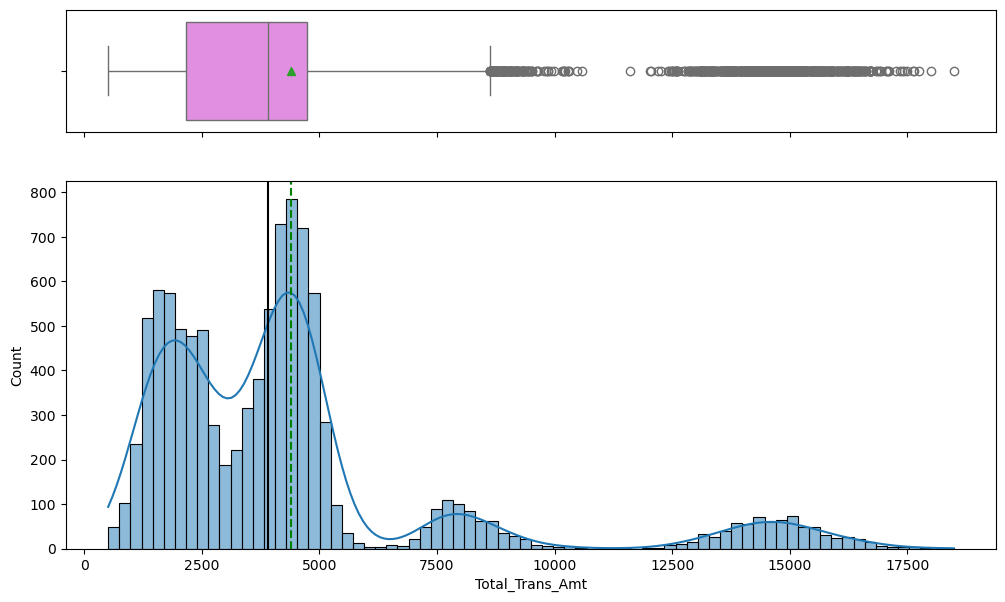

In [134]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

###### Observations: 
1. Total_Transaction_Amt displays a highly right skewed distribution with multiple humps and a lot of outliers
2. Though most of the customers make transactions between the range \\$500 - \\$8500, there are significant number of customers transacting more than \\$8500. This leads to the outliers
3. 25th Percentile (Q1): First Quartile is at \\$2000, indicating that one fourth of the customers make transactions less than or equal to \\$2000 in a year
4. 50th Percentile (Q2): Median is at \\$3300, indicating that half of the customers make transactions less than or equal to \\$3300 in a year
5. 75th Percentile (Q3): Third Quartile is at 82, indicating that three fourth of the customers make less than or equal to 82 transactions in a year.
6. InterQuartile Range (IQR) : IQR is 0.2 spanning from 0.6 to 0.8

`Total_Amt_Chng_Q4_Q1`

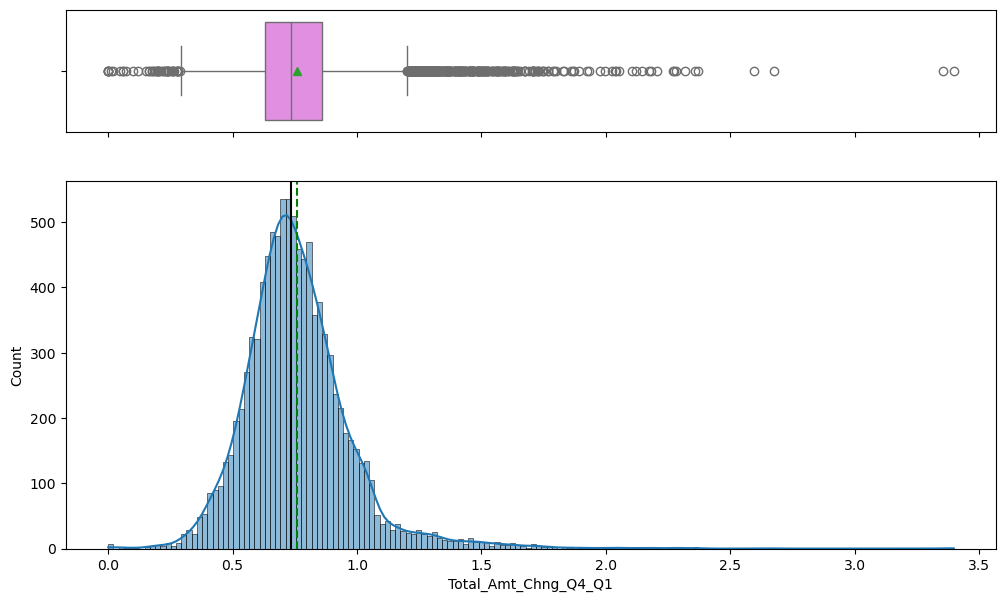

In [137]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

###### Observations: 
1. Total_Amt_Chng_Q4_Q1 follows a normal distribution with lot of outliers
2. Outliers are present on both sides (<0.3 counts and >0.8 counts)
3. 25th Percentile (Q1): First Quartile is at 0.6
4. 50th Percentile (Q2): Median is at 0.7
5. 75th Percentile (Q3): Third Quartile is at 0.8
6. InterQuartile Range (IQR) : IQR is 0.2 spanning from 0.6 to 0.8

`Avg_Utilization_Ratio`

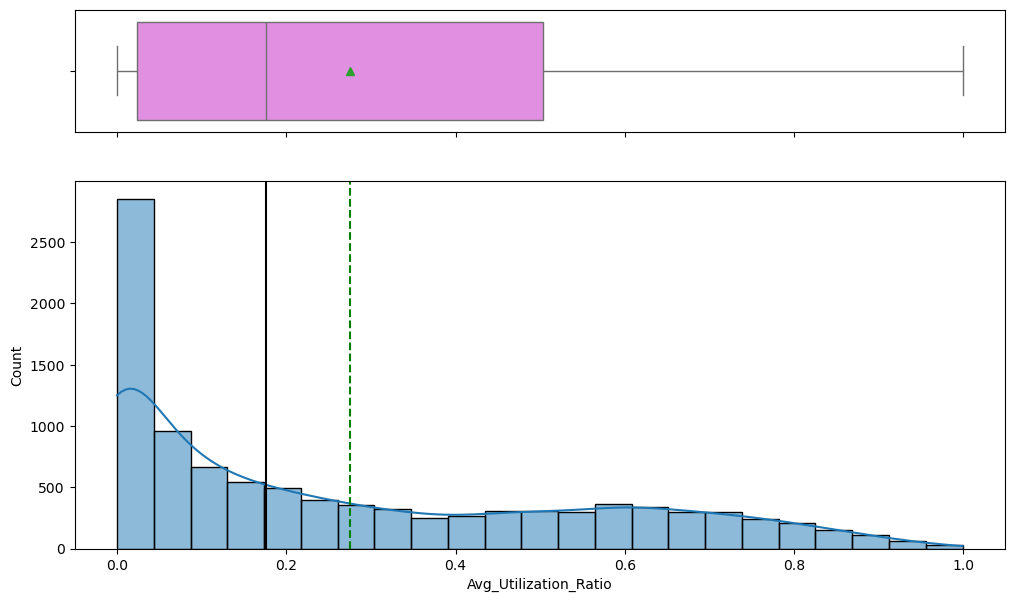

In [140]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

###### Observations: 
1. Avg_Utilization_Ratio follows a very right skewed distribution without outliers
2. Most of the customers have a Avg_Utilization_Ratio of 0
3. 25th Percentile (Q1): First Quartile is at 0.02, indicating that one fourth of the customers spend only 2% or less of their available credit
4. 50th Percentile (Q2): Median is at 0.18, indicating that half of the customers spend only 18% or less of their available credit
5. 75th Percentile (Q3): THird Quartile is at 0.5, indicating that three fourth of the customers spend only 50% or less of their available credit
6. InterQuartile Range (IQR) : IQR is 0.48 spanning from 0.02 to 0.5

`Dependent_count`

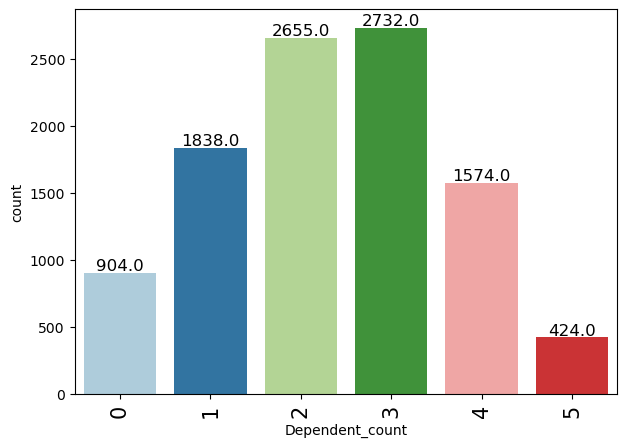

In [267]:
labeled_barplot(data, "Dependent_count")

###### Observations:
1. Most of the customers have 2 or 3 dependents
2. Customers with 5 dependents are the least in number
3. 8% of customers have 0 dependents

`Total_Relationship_Count`

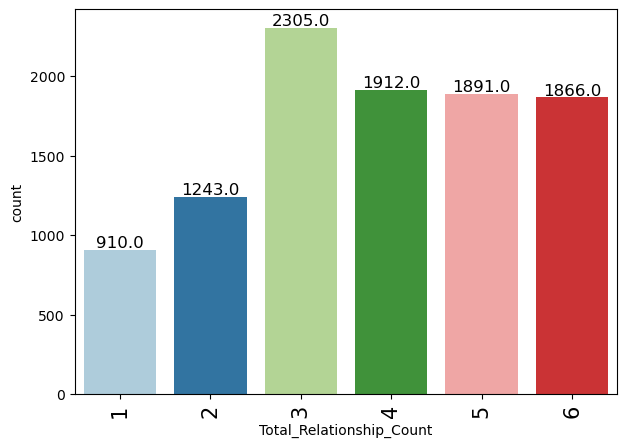

In [273]:
labeled_barplot(data, "Total_Relationship_Count")

###### Observations:
1. Most of the customers hold 3 products
2. Maximum number of products are held by 1866 customers
3. Around 80% of the customers hold atleast 3 products

`Months_Inactive_12_mon`

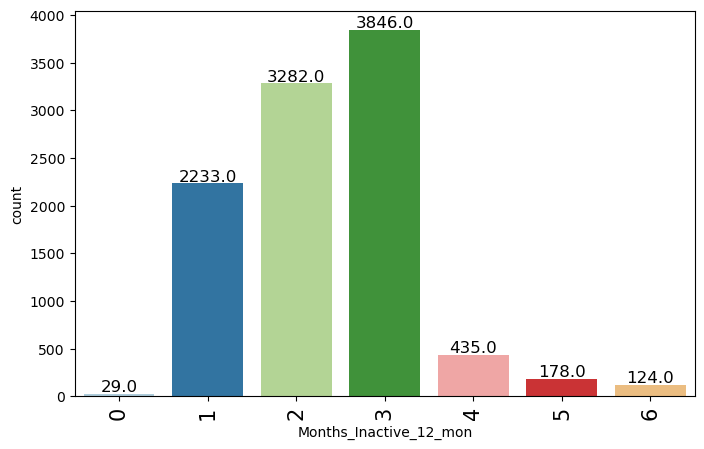

In [280]:
labeled_barplot(data, "Months_Inactive_12_mon")

###### Observations: 
1. Negligible (~29) number of customers were active the entire year
2. Most of the customers stay inactive for 3 months in a year
3. Very few customers (~124) were inactive for the max period of 6 months in a year

`Contacts_Count_12_mon`

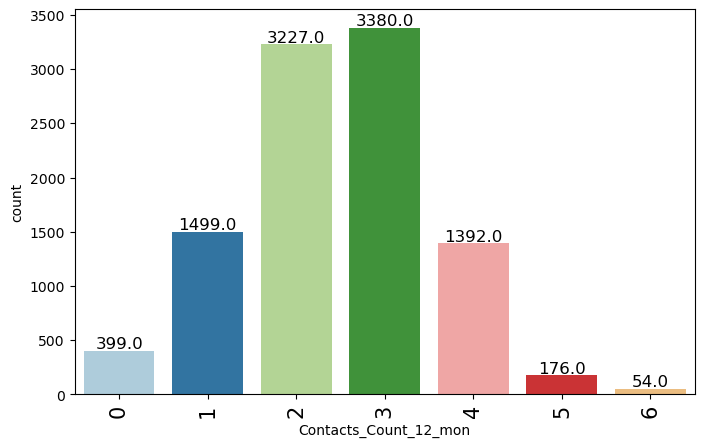

In [286]:
labeled_barplot(data, "Contacts_Count_12_mon")

###### Observations:
1. 399 Customers did not make any contact in 1 year
2. 54 Customers made the maximum number of contacts in a year
3. Maximum number of customers make 3 contacts in a year

`Gender`

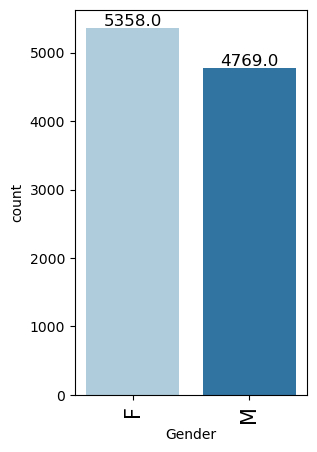

In [292]:
labeled_barplot(data, "Gender")

##### Observations: Most of the customers are Females (53%)

`Education_Level`

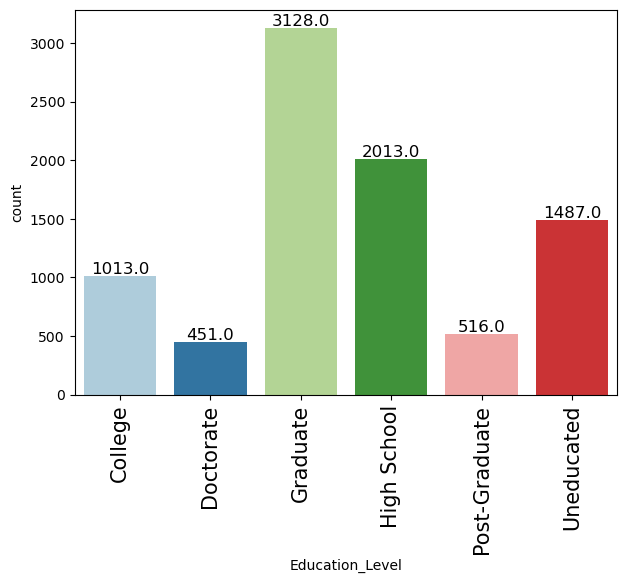

In [294]:
labeled_barplot(data, "Education_Level")

##### Observations:
1. Most of the customers are Graduates followed by high schoolers
2. Only 4% of the customers have the highest level of Education (Doctorate) whereas 14.6% have the lowest level of Education (uneducated)
3. Education_Level has 15% missing values which will be imputed later with the most frquent value which is Graduate

`Marital_Status`

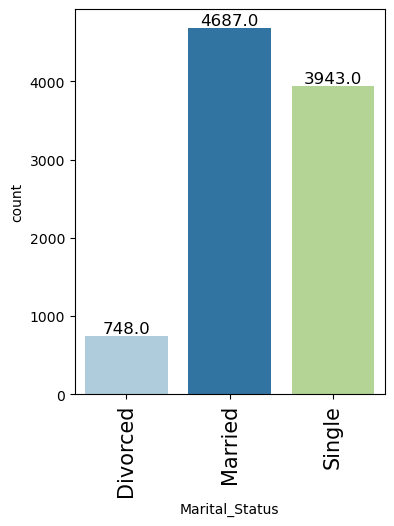

In [301]:
labeled_barplot(data, "Marital_Status")

##### Observation : Most of the cutomers are Married (46%) followed by single (39%)

`Income_Category`

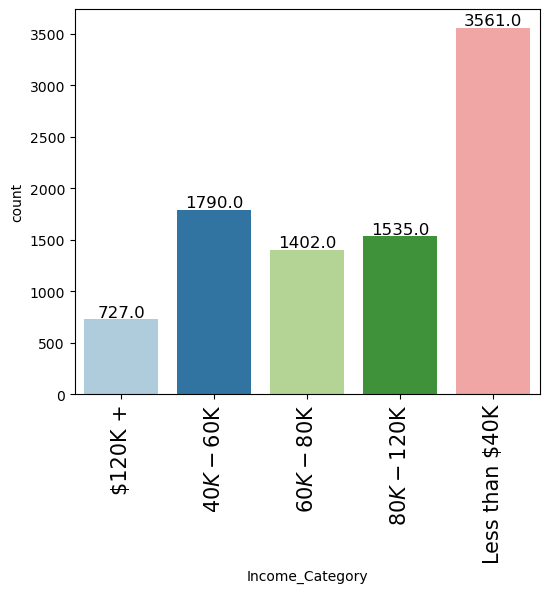

In [561]:
labeled_barplot(data, "Income_Category")

##### Observations:
1. Most of the customers draw less than \\$40K per annum
2. Few customers (~727) draw greater than \\$127K per annum
3. Around 11% of the columns have missing values which will be imputed with most frequent options after data split

`Card_Category`

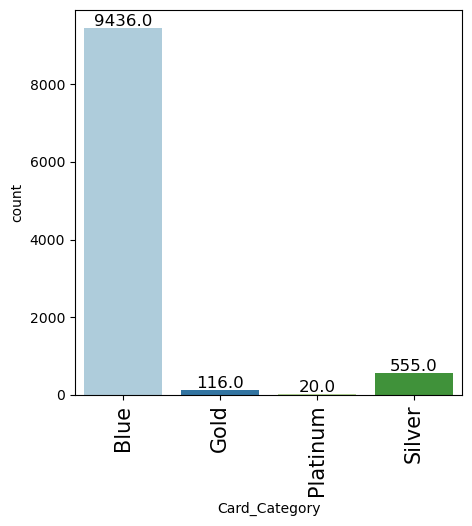

In [313]:
labeled_barplot(data, "Card_Category")

##### Observations:
1. 93% of the customers hold Blue card followed by 5% with silver card
2. ~1.3% of the customers hold a Gold or Platinum card

`Attrition_Flag`

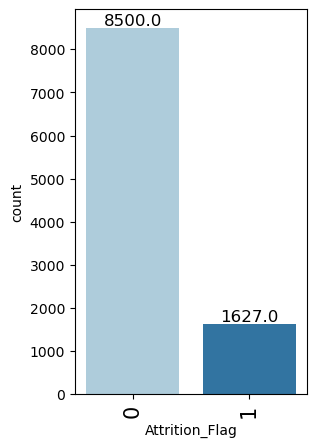

In [316]:
labeled_barplot(data, "Attrition_Flag")

##### Observations :
1. 8500 customers (83%) are Existing Customers
2. 1627 customers (17%) have moved on

### Bivariate Distributions

**Correlation Check**

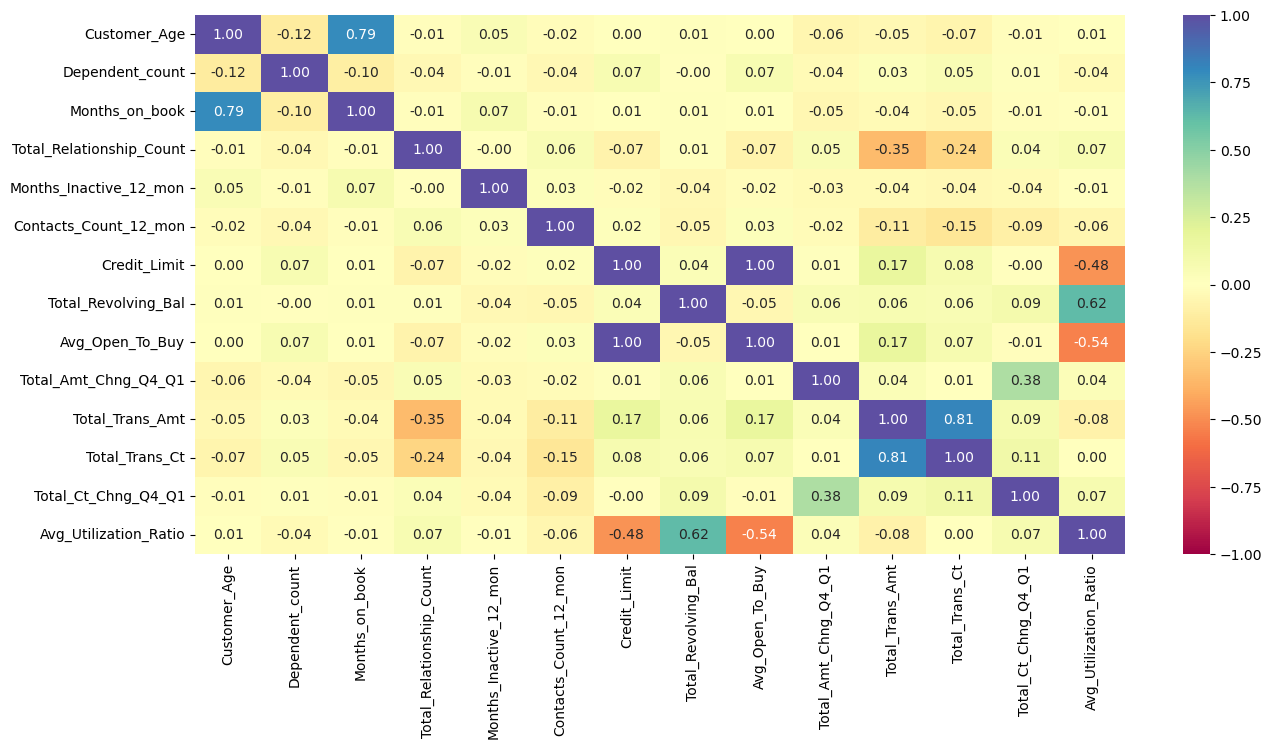

In [321]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

##### Observations :
1. Customer_Age and Months_on_Book are highly correlated
2. Total_Relationship_Count has a light negative correlation with Total_Trans_Amt and Total_Trans_CT
3. Credit_Limit has a moderate negative correlation with Avg_Utilization_Ratio
4. Total Revolving_Bal has high positive correlation with Avg_Utilization_Ratio
5.  Avg_Open_To_Buy has moderate negative correlation with Avg_Utilization_Ratio
6.  Total_Amt_Chng_Q4_Q1 has moderate positive correllation to Total_Ct_Chng_Q4_Q1
7.  Total_Trans_Amt has high correlation with Total_Trans_Ct

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


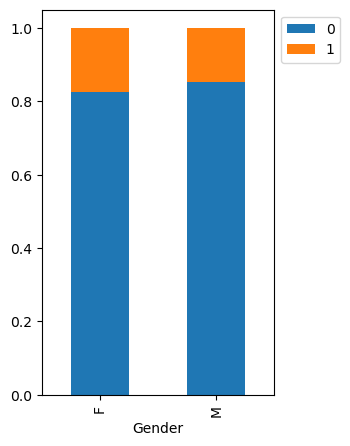

In [328]:
stacked_barplot(data, "Gender", "Attrition_Flag")

##### Observations:
1. Attrition is marginally higher in Females than in Males
2. Out of the 1627 attrited customers, 57% were Females
3. Out of the 8500 existing customers, 52% were Females

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


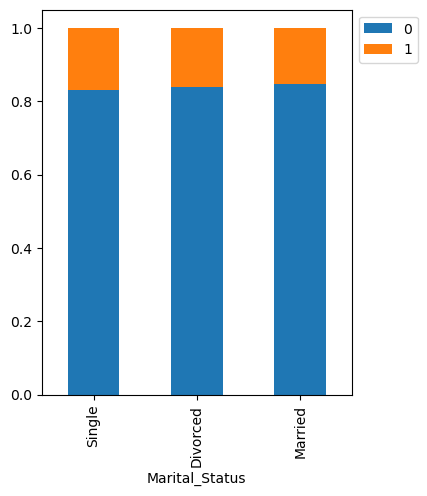

In [332]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag")

##### Observations : 
1. However, Attrition is marginally higher in Married Customers than in Single Customers
2. Out of the 1498 attrited customers, 47.3% were Married and 44.5% were single
3. Out of the 7880 existing customers, 50.5% were married ad 41.5% were single

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


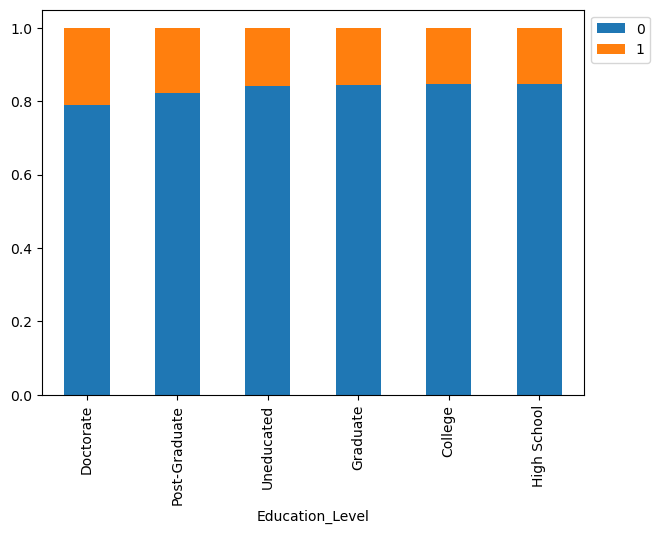

In [339]:
stacked_barplot(data,"Education_Level", "Attrition_Flag")

##### Observations :
1. Maximum attrition was seen in Graduates and least attrition was seen in Doctorates and Post-Graduates
2. Out of the 1371 attrited customers, 35.5% were Graduates
3. Out of the 1371 attrited customers, 6.7% were Post-Graduates

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
Unknown           925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


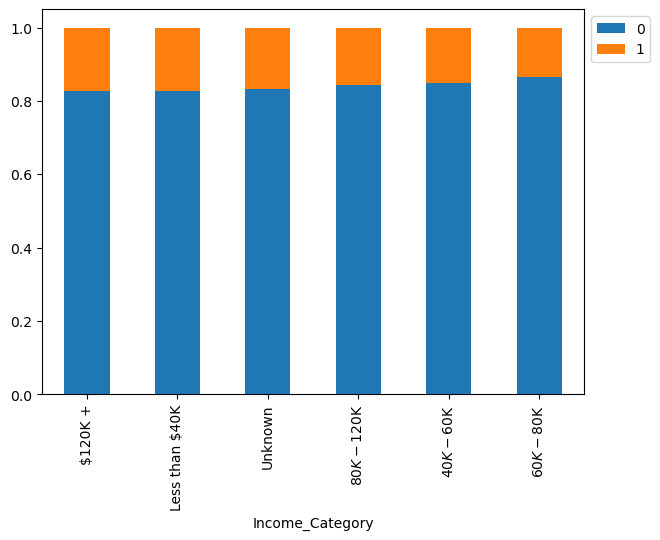

In [345]:
stacked_barplot(data,"Income_Category", "Attrition_Flag")

##### Observations : 
1. Customers with less than \\$40K income have the highest attrition and customers with \\$120K+ income have least attrition rate
2. Out of the 1627 attrited customers, 37.6% were from the lowest income category and 7.7% were from highest income category
3. The Education level of 11.5% of attrited customers is unknown

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


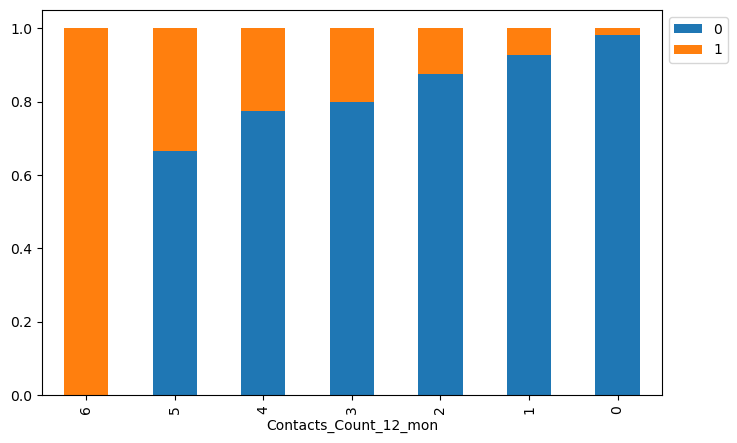

In [352]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag")

##### Observations:
1. Customers with 3 contacts in the last 12 months have the highest attrition rates
2. There is 100% attrition in customers with 6 contacts in one year
3. Out of the 399 customers who have not made any contacts in a year, 98% have stayed on

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


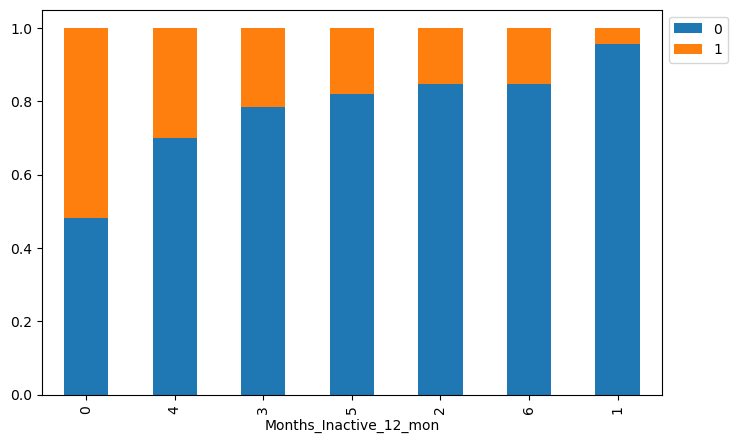

In [356]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag")

##### Observations : 
1. Customers who have been inactive for 2 or 3 months show the highest % of churn(50.7% and 31%)
2. Out of the 29 Customers with 0 inactivity period, 51% moved on
3. Out of the customers with 1 month inactivity period, 93% stayed

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


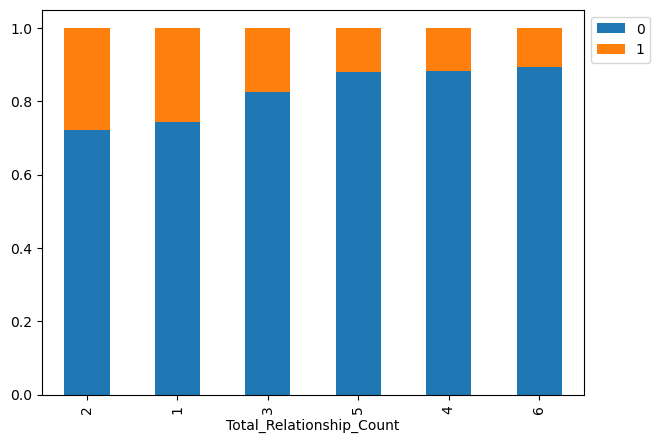

In [364]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag")

##### Observations :
1. Out of the 1627 attrited customers, 24.5% held 3 relationships
2. Around ome - fourth of the customers who hels 1 or 2 relationships, moved on.

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


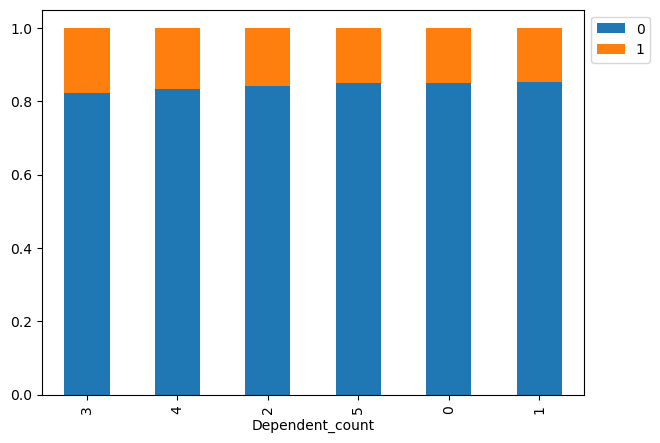

In [371]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag")

##### Observations : 
1. Customers with 3 dependents have the highest rate of attrition (29.6%), followed by those with 2 dependents (25.6%).
2. Customers with 5 dependents have a lowest attrition rate (4%)
3. Out of 904 customers with no dependents, 85% stayed on

`Total_Revolving_Bal vs Attrition_Flag`

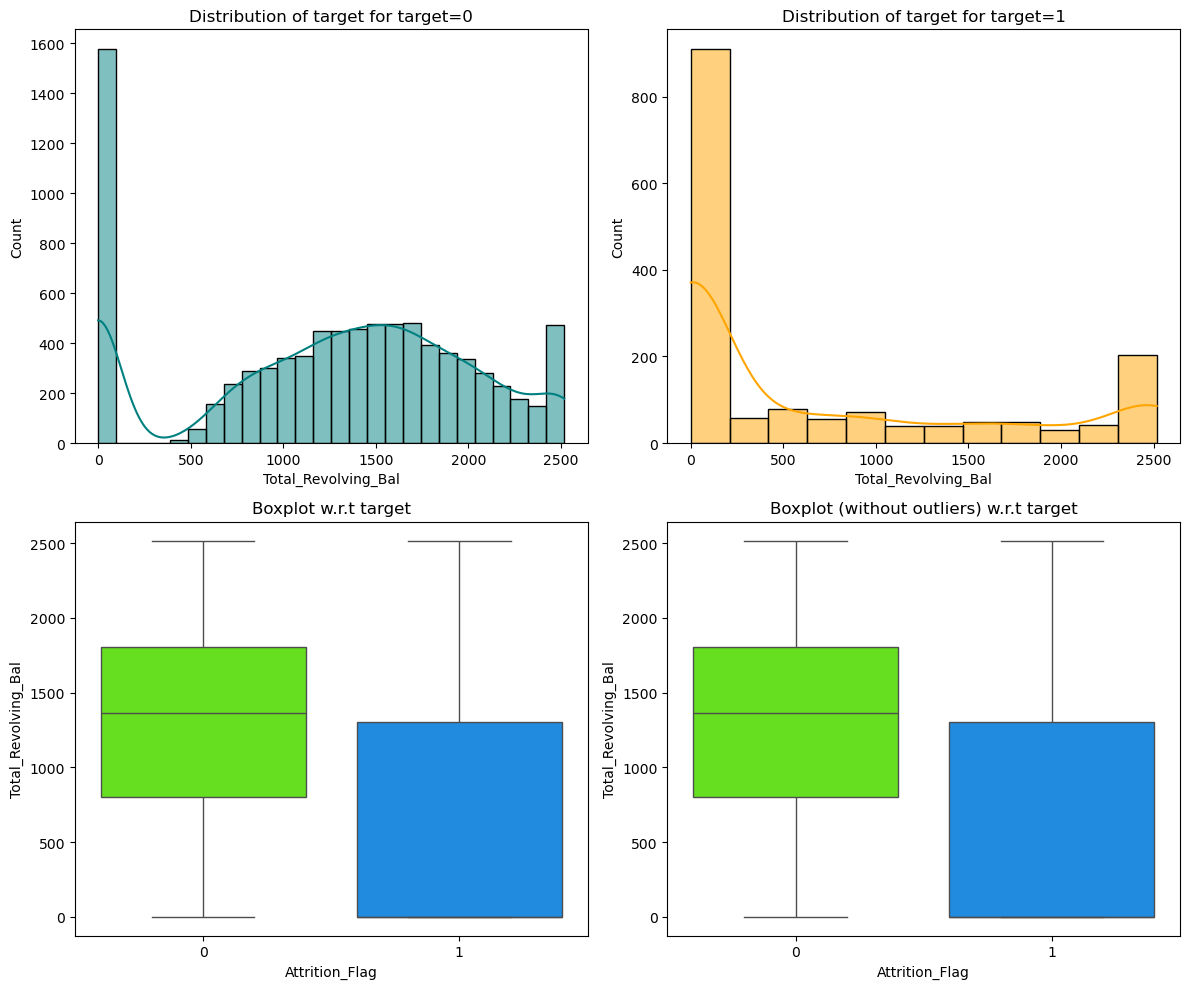

In [405]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

##### Observations :
1. For Existing customers, the Total_Revolving_Bal follows a uniform distribution.
2. There are outliers due to few of the customers having very high balance (~\\$2500)
3. Most of the existing customers have 0 Revolving balance
4. For Attrited customers, the Total_Revolving_Bal follows a very right skewed distribution.
5. There are outliers due to few of the customers having very high balance (~\\$2500)
6. Most of the attrited customers have 0 Revolving balance

`Attrition_Flag vs Credit_Limit`

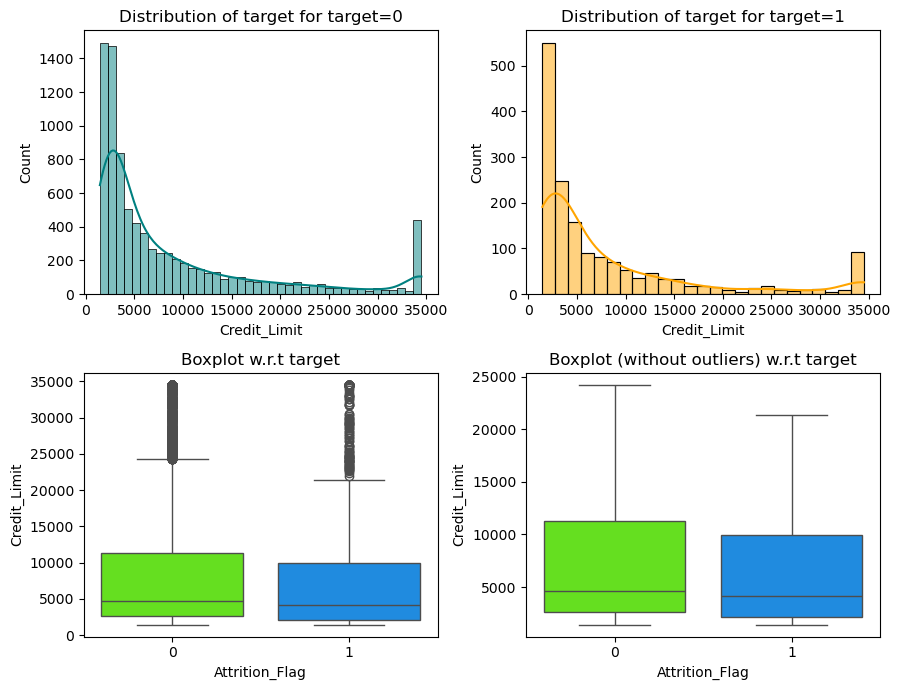

In [439]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

##### Observations
1. Credit_Limit is right skewed for both values of Attrition_Flag
2. There are lot of outliers present on both graphs due to some customers having very high credit limit compared to the others
3. For both categories, most of the customers have credit limit below \\$5000
4. The median credit limit for both categories is ~\\$5000
5. Upper range is higher for existing customers

`Attrition_Flag vs Customer_Age`

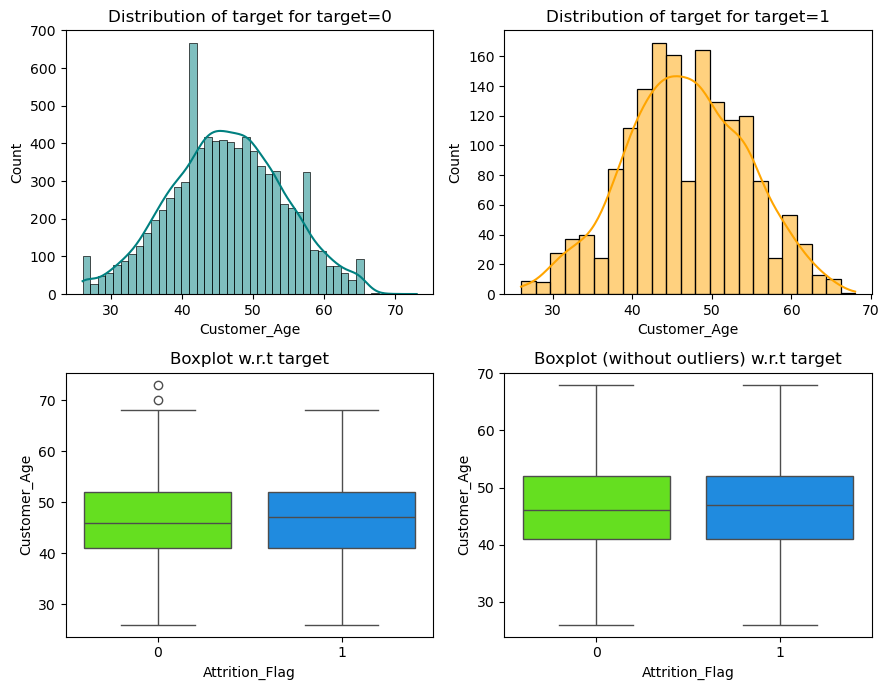

In [443]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

##### Observations:
1. Customer Age follows a normal distribution for both categories
2. Median is around 45 yrs for both categories of Attrition Flag
3. There is not much difference in the distribution for both cases

`Total_Trans_Ct vs Attrition_Flag`

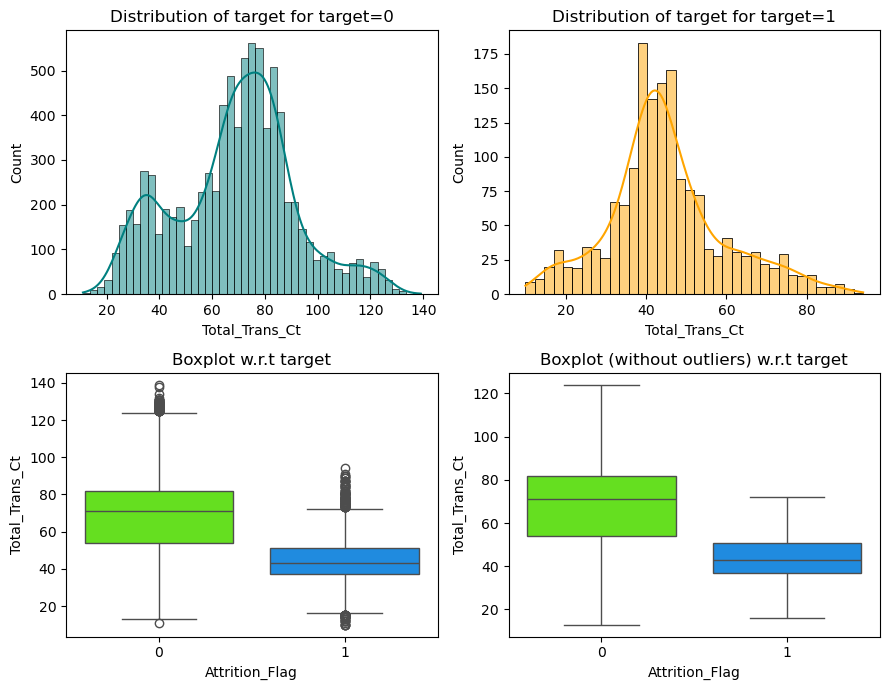

In [447]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

##### Observations:
1. The distribution for Total Transactions is left skewed for the existing customers with outliers
2. The distribution is normal for attrited customers with outliers
3. The total transaction range is higher for existing customers (55-80) as compared to attrited customers (35-50)
4. Median transactions count for existing customers is much higher than attrited customers
5. The more transactions the customers make, the more chances of them staying back

`Total_Trans_Amt vs Attrition_Flag`

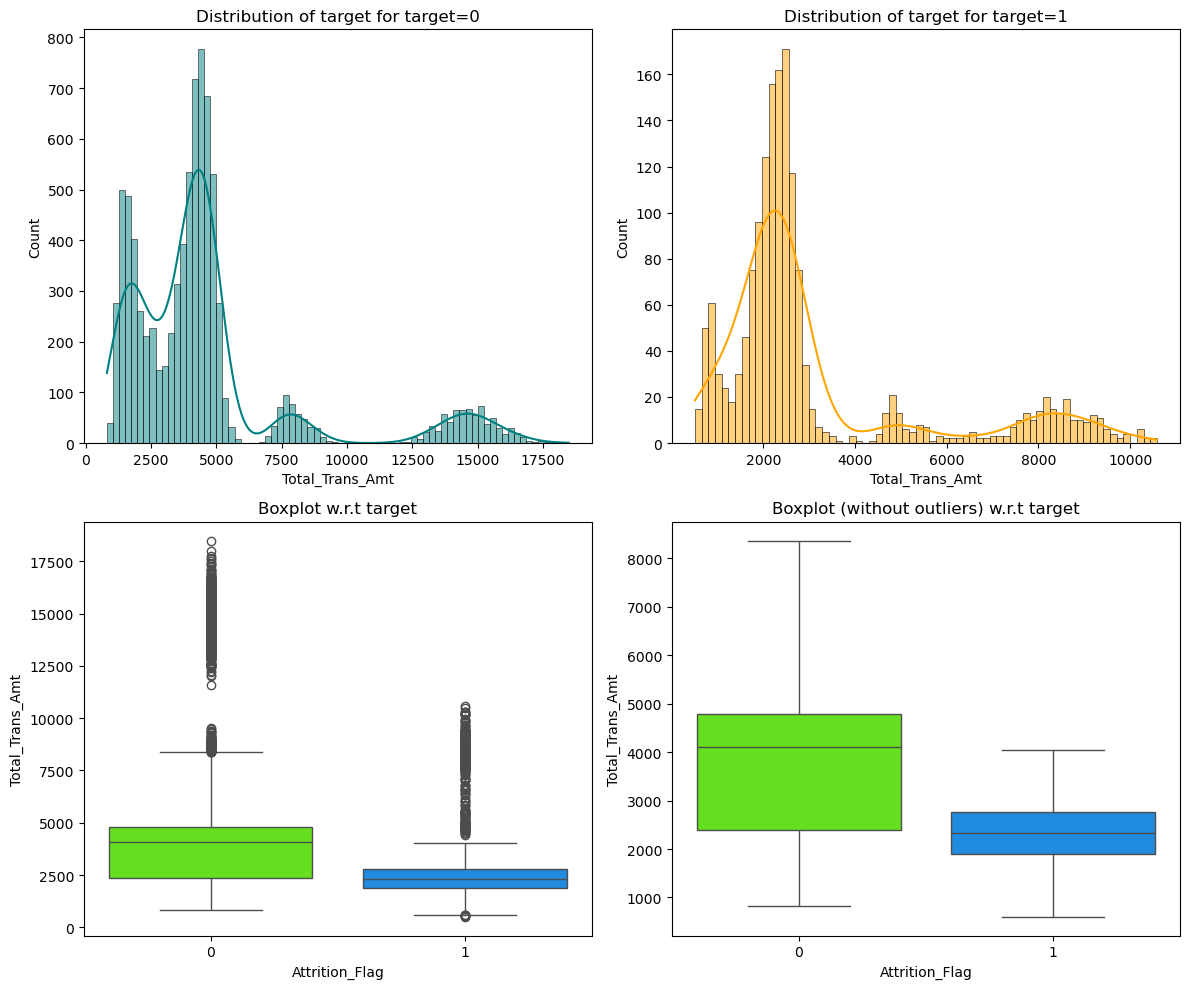

In [426]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

##### Observations
1. Total Transaction Amount range is higher for existing customers than attrited customers
2. Median trasaction amount for existing customers is \\$4000 as compared to \\$2500 for attrited customers
3. Few customers have moved on without making much transactions
4. Customers who trust the bank and spend more on the card tend to stay with the bank

`Total_Ct_Chng_Q4_Q1 vs Attrition_Flag`

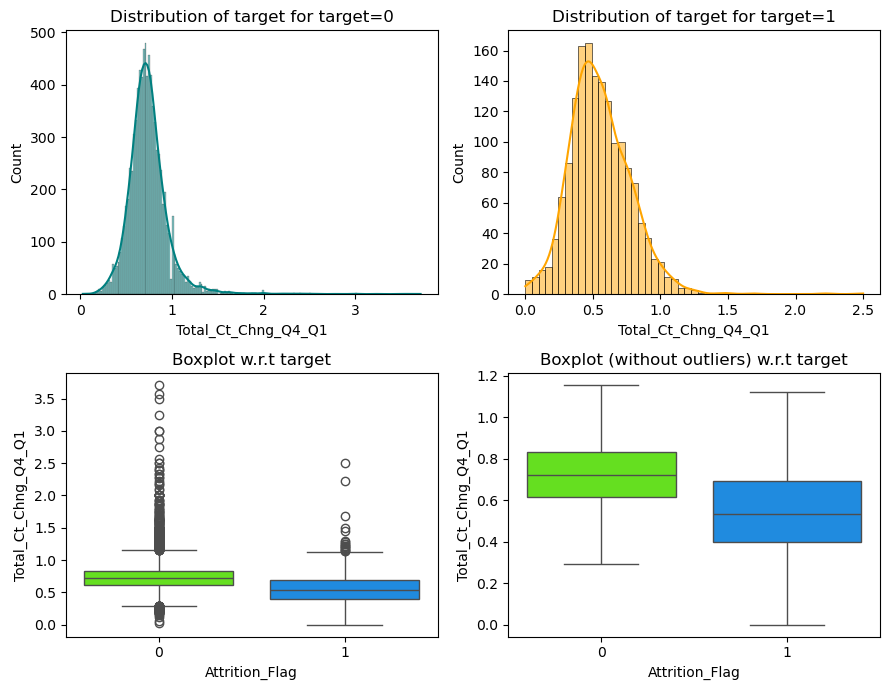

In [451]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

##### Observations
1. Total Count Change from Q4 to Q1 follows a right skewed distribution for both categories of Customer accounts
2. There are a lot of outliers in both categories
3. The median change is higher in existing customers than attrited customers
4. Though attrited customers have a larger range for Change, Existing customers have higher Q1,Q2,Q3

`Avg_Utilization_Ratio vs Attrition_Flag`

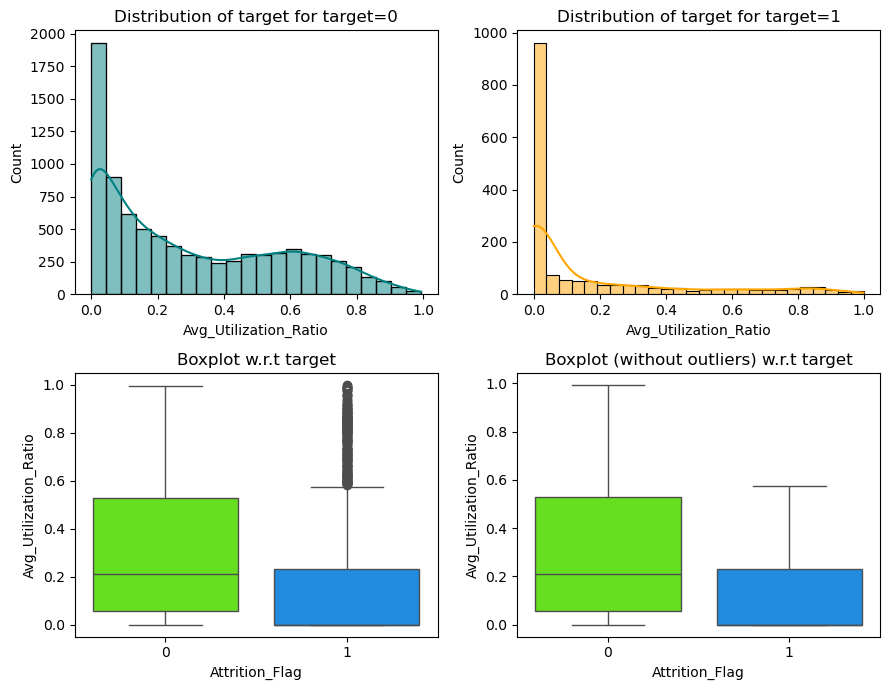

In [454]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

##### Observations
1. Both categories follow a right skewed distribution
2. Most of the customers in both categories have 0 utilization ratio
3. Existing customers have a larger range for utization ratio
4. Most of the attrited customer do not seem to have used their credit limit

`Attrition_Flag vs Months_on_book`

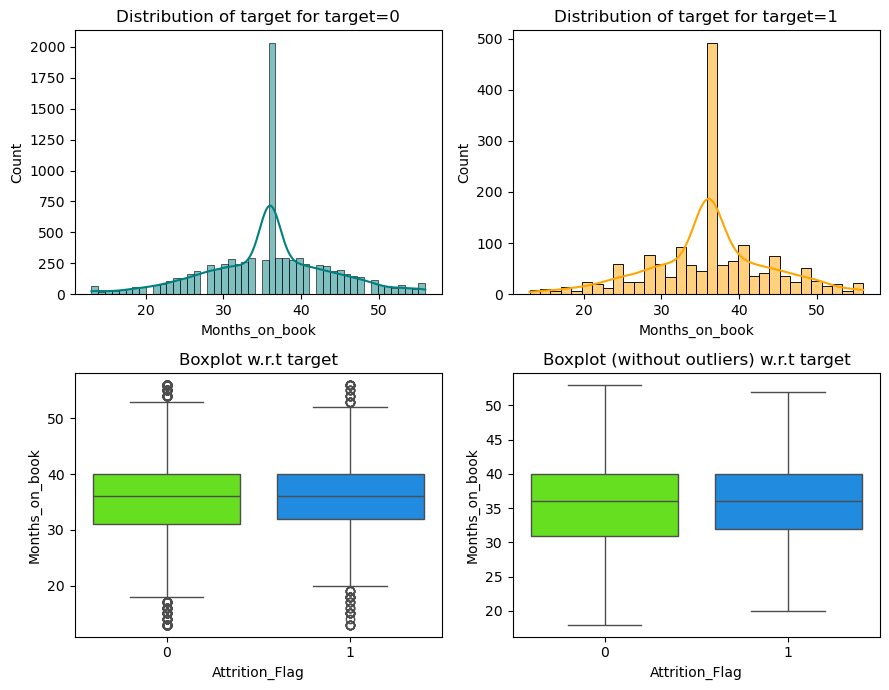

In [457]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

##### Observations
1. Both categories show similar distributions with a lot of outliers
2. Median months on book is around 37 months for both categories

`Attrition_Flag vs Avg_Open_To_Buy`

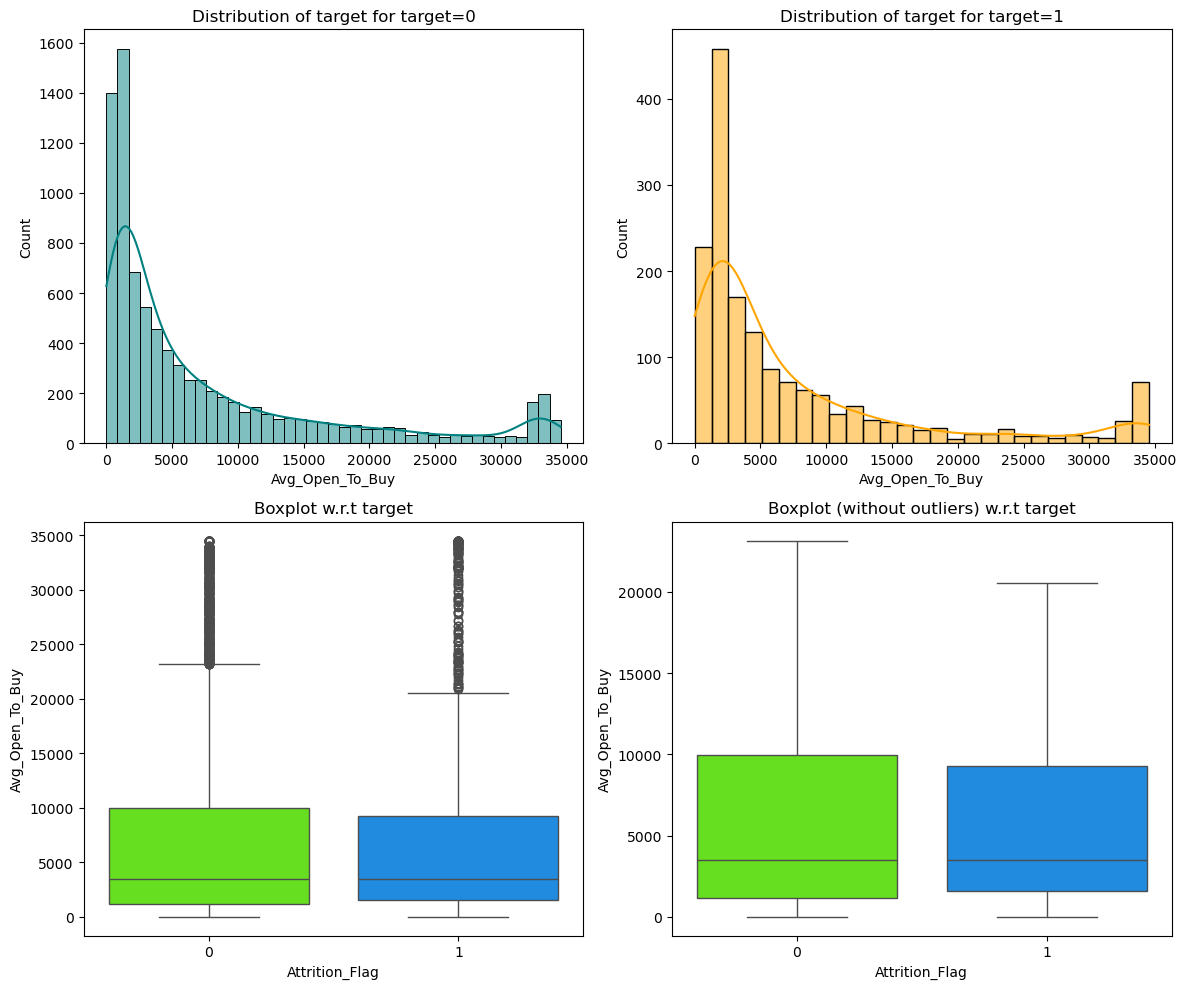

In [412]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

##### Observations
1. Average Open to buy is very less for most of the customers
2. Median value for both categories is \\$4000
3. Existing customers have a slightly larger range 

**Questions**: Detailed analysis and graphs for all these questions are provided in the EDA section

1. How is the total transaction amount distributed?
   
Total_Transaction_Amt displays a highly right skewed distribution with multiple humps and a lot of outliers. Though most of the customers make transactions between the range \\$500 - \\$8500, there are significant number of customers transacting more than \\$8500. This leads to the outliers.  
25th Percentile (Q1): First Quartile is at \\$2000, indicating that one fourth of the customers make transactions less than or equal to \\$2000 in a year
50th Percentile (Q2): Median is at \\$3300, indicating that half of the customers make transactions less than or equal to \\$3300 in a year
75th Percentile (Q3): Third Quartile is at 82, indicating that three fourth of the customers make less than or equal to 82 transactions in a year.
InterQuartile Range (IQR) : IQR is 0.2 spanning from 0.6 to 0.8
   
2. What is the distribution of the level of education of customers?

Most of the customers are Graduates followed by high schoolers. Only 4% of the customers have the highest level of Education (Doctorate) whereas 14.6% have the lowest level of Education (uneducated). Education_Level has 15% missing values which will be imputed later with the most frquent value which is Graduate

3. What is the distribution of the level of income of customers?

Most of the customers draw less than \\$40K per annum. Few customers (~727) draw greater than \\$127K per annum. Around 11% of the columns have missing values which will be imputed with most frequent options after data split.  

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

total_ct_change_Q4_Q1 follows a right skewed distribution for both categories of Customer accounts. There are a lot of outliers in both categories. The median change is higher in existing customers than attrited customers. Though attrited customers have a larger range for Change, Existing customers have higher Q1,Q2,Q3   

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

Customers who have been inactive for 2 or 3 months show the highest % of churn(50.7% and 31%). Out of the 29 Customers with 0 inactivity period, 51% moved on. Out of the customers with 1 month inactivity period, 93% stayed  

6. What are the attributes that have a strong correlation with each other?

Customer_Age and Months_on_Book are highly correlated.  
Total_Relationship_Count has a light negative correlation with Total_Trans_Amt and Total_Trans_CT.  
Credit_Limit has a moderate negative correlation with Avg_Utilization_Ratio.  
Total Revolving_Bal has high positive correlation with Avg_Utilization_Ratio.  
Avg_Open_To_Buy has moderate negative correlation with Avg_Utilization_Ratio.  
Total_Amt_Chng_Q4_Q1 has moderate positive correllation to Total_Ct_Chng_Q4_Q1.  
Total_Trans_Amt has high correlation with Total_Trans_Ct

## Data Pre-processing

### Outlier Detection

In [564]:
# Filter the DataFrame to include only numeric columns (int64 and float64)
numeric_df = data.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_df.quantile(0.25)  # To find the 25th percentile
Q3 = numeric_df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [566]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

###### Observations
1. The columns Credit_Limit, Avg_Open_To_Buy, and Total_Trans_Amt have relatively higher percentages of outliers
2. 
Columns likeDependent_count, Total_Relationship_count, Total_Revolving_Bal, Avg_Utilization_Ratio,  Customer_Agt, and Total_Trans_Ct have almost no outliers, indicating a relatively normal and consistent distribution of values in those columns
3. Columns Months_book, Months_Inactve_12_mon, Contacts_Count_12_mon, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1 have moderate percentages of outliers.

### Train-Test Split

In [568]:
# creating the copy of the dataframe
df = data.copy()

In [570]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [572]:
# Dividing train data into X and y

X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [574]:
# Splitting data into training and validation set: split the data into train test in the ratio 80:20

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) 

# split the data into train test in the ratio 75:25

X_test, X_val, y_test, y_val = train_test_split( X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp) 

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


###### Observations:
1. The training set contains 8101 rows and 19 columns
2. The validation set contains 507 rows and 19 columns
3. The test set contains 1519 rows and 19 columns

## Missing value imputation




In [576]:
col_with_missing_values = ["Education_Level", "Marital_Status", "Income_Category"]

In [578]:
# Fit and transform the train data
X_train[col_with_missing_values] = imputer.fit_transform(X_train[col_with_missing_values])

# Transform the validation data
X_val[col_with_missing_values]  =  imputer.fit_transform(X_val[col_with_missing_values])

# Transform the test data
X_test[col_with_missing_values] = imputer.fit_transform(X_test[col_with_missing_values])

In [580]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [582]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


In [584]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    260
M    247
Name: count, dtype: int64
******************************
Education_Level
Graduate         246
High School       85
Uneducated        73
College           56
Post-Graduate     27
Doctorate         20
Name: count, dtype: int64
******************************
Marital_Status
Married     292
Single      185
Divorced     30
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    228
$40K - $60K       100
$60K - $80K        75
$80K - $120K       75
$120K +            29
Name: count, dtype: int64
******************************
Card_Category
Blue        468
Silver       30
Gold          8
Platinum      1
Name: count, dtype: int64
******************************


In [586]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [588]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype('float')

X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype('float')

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype('float')

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (507, 29) (1519, 29)


In [590]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
3105,53.000,2.000,37.000,5.000,3.000,4.000,7282.000,0.000,7282.000,0.740,3364.000,69.000,0.816,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
3721,44.000,4.000,37.000,4.000,3.000,3.000,5826.000,0.000,5826.000,0.689,3756.000,73.000,0.921,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3389,50.000,3.000,41.000,4.000,2.000,2.000,2563.000,1860.000,703.000,0.680,3774.000,83.000,0.804,0.726,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3552,50.000,1.000,30.000,6.000,2.000,3.000,9771.000,1776.000,7995.000,0.460,2778.000,53.000,0.472,0.182,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
398,55.000,0.000,49.000,5.000,3.000,3.000,3805.000,2233.000,1572.000,1.095,1743.000,27.000,0.929,0.587,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Model Building

### Model evaluation criterion

###### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

###### Which case is more important?

Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

###### How to reduce this loss i.e need to reduce False Negatives??

Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [592]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [594]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [602]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9838709677419355
Random forest: 1.0
Logistic Regression: 0.44086021505376344
GBM: 0.8840245775729647
Adaboost: 0.84715821812596
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8148148148148148
Random forest: 0.7530864197530864
Logistic Regression: 0.3950617283950617
GBM: 0.9012345679012346
Adaboost: 0.8641975308641975
dtree: 0.8271604938271605
XGBoost: 0.9382716049382716


##### Observations 
1. GBM has the best performance followed by AdaBoost model as per the validation performance
2. All other models have been overfit
3. Logistic Regression Model has the least performance

### Model Building with Oversampled data


In [605]:
# Synthetic Minority Over Sampling Technique
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)  
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [607]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
Logistic Regression: 0.8488012943079865
GBM: 0.9816149433740256
Adaboost: 0.969848507133402
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8888888888888888
Random forest: 0.8395061728395061
Logistic Regression: 0.7901234567901234
GBM: 0.9012345679012346
Adaboost: 0.8518518518518519
dtree: 0.8148148148148148
XGBoost: 0.9382716049382716


##### Observations:
1. All models have been overfit
2. XGBoost has the best performance on validation followed by GBM

### Model Building with Undersampled data

In [610]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [612]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [614]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9946236559139785
Random forest: 1.0
Logistic Regression: 0.7987711213517665
GBM: 0.9823348694316436
Adaboost: 0.9516129032258065
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9382716049382716
Random forest: 0.9506172839506173
Logistic Regression: 0.7901234567901234
GBM: 0.9382716049382716
Adaboost: 0.9506172839506173
dtree: 0.9135802469135802
XGBoost: 0.9753086419753086


##### Observations
1. XGBoost has the best performance followed by AdaBoost model as per the validation performance
2. Adaboost model has similar performance on training and validation set. Hence, will be able to generalize well
3. Performance of GBM, Random Forest and Bagging models are not bad

- After building 21 models, it was observed that both the XGBoost, GBM and Adaboost models, trained on an undersampled dataset exhibited strong performance on both the training and validation datasets.
- Bagging and Random Forest have exhibited reasonable performance on undersampled dataset
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 5 models using the same data (undersampled or oversampled)

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

`Bagging Classifier Model`

###### BaggingClassifier Model with Hyperparameter tuning on Original data

In [849]:
# defining model
Model = BaggingClassifier(random_state=1, estimator=DecisionTreeClassifier(class_weight='balanced', random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.8148776893604479:


In [851]:
# Creating new pipeline with best parameters
tuned_bc = BaggingClassifier(
                    random_state=1,
                    n_estimators= 50,
                    max_samples= 0.9,
                    max_features=0.8,
                    estimator= DecisionTreeClassifier(class_weight='balanced', random_state=1))

tuned_bc.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [853]:
# Checking model's performance on original training set
bc_train = model_performance_classification_sklearn(tuned_bc, X_train, y_train)
bc_train

,Accuracy,Recall,Precision,F1
0,1.000,0.998,0.999,0.999


In [855]:
# Checking model's performance on original validation set
bc_val = model_performance_classification_sklearn(tuned_bc, X_val, y_val)
bc_val

,Accuracy,Recall,Precision,F1
0,0.964,0.827,0.944,0.882


##### Observations
Model is definitely overfit on the trining set.  
Recall value has reduced in validation set

###### BaggingClassifier Model with Hyperparameter tuning on Oversampled data

In [857]:
# defining model
Model = BaggingClassifier(random_state=1, estimator = DecisionTreeClassifier(class_weight='balanced', random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:


In [675]:
# Creating new pipeline with best parameters
tuned_bc_over = BaggingClassifier(
                    random_state=1,
                    n_estimators= 70,
                    max_samples= 1,
                    max_features=0.8,
                    estimator= DecisionTreeClassifier(class_weight='balanced', random_state=1))

tuned_bc_over.fit(X_train_over,y_train_over)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  max_features=0.8, max_samples=1, n_estimators=70,
                  random_state=1)

In [677]:
# Checking model's performance on oversampled training set
bc_train_over = model_performance_classification_sklearn(tuned_bc_over, X_train_over, y_train_over)
bc_train_over

,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


In [679]:
# Checking model's performance on original validation set
bc_val_over = model_performance_classification_sklearn(tuned_bc_over, X_val, y_val)
bc_val_over

,Accuracy,Recall,Precision,F1
0,0.160,1.000,0.160,0.276


##### Observations
Model has a perfect recall score in training and validation set with oversampled dataset.  
However, Accuracy, Precision and F1 scores are very low leading to poor model performance with oversampled data

###### BaggingClassifier Model with Hyperparameter tuning on Undersampled data

In [682]:
# defining model
Model = BaggingClassifier(random_state=1, estimator = DecisionTreeClassifier(class_weight='balanced', random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


In [684]:
# Creating new pipeline with best parameters
tuned_bc_un = BaggingClassifier(
                    random_state=1,
                    n_estimators= 70,
                    max_samples= 1,
                    max_features=0.8,
                    estimator= DecisionTreeClassifier(class_weight='balanced', random_state=1))

tuned_bc_un.fit(X_train_un,y_train_un)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  max_features=0.8, max_samples=1, n_estimators=70,
                  random_state=1)

In [686]:
# Checking model's performance on undersampled training set
bc_train_un = model_performance_classification_sklearn(tuned_bc_un, X_train_un, y_train_un)
bc_train_un

,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


In [688]:
# Checking model's performance on original validation set
bc_val_un = model_performance_classification_sklearn(tuned_bc_un, X_val, y_val)
bc_val_un

,Accuracy,Recall,Precision,F1
0,0.160,1.000,0.160,0.276


##### Observations
Model has a perfect recall score in training and validation set with undersampled dataset.  
However, Accuracy, Precision and F1 scores are very low leading to poor model performance with undersampled data

`Random Forest Classifier Model`

##### RandomForestClassifier Model with Hyperparameter tuning on Original data

In [693]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 25, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7734188034188034:


In [737]:
# Creating new pipeline with best parameters
tuned_rfc = RandomForestClassifier(
                    random_state=1,
                    n_estimators= 25,
                    max_samples= 0.6,
                    max_features='sqrt',
                    min_samples_leaf=1)

tuned_rfc.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=25, random_state=1)

In [739]:
# Checking model's performance on original training set
rfc_train = model_performance_classification_sklearn(tuned_rfc, X_train, y_train)
rfc_train

,Accuracy,Recall,Precision,F1
0,0.995,0.975,0.995,0.985


In [741]:
# Checking model's performance on original validation set
rfc_val = model_performance_classification_sklearn(tuned_rfc, X_val, y_val)
rfc_val

,Accuracy,Recall,Precision,F1
0,0.953,0.765,0.925,0.838


###### Observations
Model is overfitting on training dataset.  
All scores have reduced in validation set

##### RandomForestClassifier Model with Hyperparameter tuning on Oversampled data

In [706]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9513230965675452:


In [731]:
# Creating new pipeline with best parameters
tuned_rfc_over = RandomForestClassifier(
                    random_state=1,
                    n_estimators= 110,
                    max_samples= 0.5,
                    max_features='sqrt',
                    min_samples_leaf=2)

tuned_rfc_over.fit(X_train_over,y_train_over)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=110,
                       random_state=1)

In [733]:
# Checking model's performance on original training set
rfc_train_over = model_performance_classification_sklearn(tuned_rfc_over, X_train_over, y_train_over)
rfc_train_over

,Accuracy,Recall,Precision,F1
0,0.993,0.995,0.991,0.993


In [735]:
# Checking model's performance on oversampled validation set
rfc_val_over = model_performance_classification_sklearn(tuned_rfc_over, X_val, y_val)
rfc_val_over

,Accuracy,Recall,Precision,F1
0,0.953,0.802,0.890,0.844


###### Observations
Recall and F1 values for validation set s much lesser than that of validation set.  
performance on the training set is awesome

##### RandomForestClassifier Model with Hyperparameter tuning on Undersampled data

In [714]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9416209843796051:


In [722]:
# Creating new pipeline with best parameters
tuned_rfc_un = RandomForestClassifier(
                    random_state=1,
                    n_estimators= 110,
                    max_samples= 0.6,
                    max_features='sqrt',
                    min_samples_leaf=1)

tuned_rfc_un.fit(X_train_un,y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [724]:
# Checking model's performance on undersaampled training set
rfc_train_un = model_performance_classification_sklearn(tuned_rfc_un, X_train_un, y_train_un)
rfc_train_un

,Accuracy,Recall,Precision,F1
0,0.998,1.000,0.996,0.998


In [729]:
# Checking model's performance on undersampled validation set
rfc_val_un = model_performance_classification_sklearn(tuned_rfc_un, X_val, y_val)
rfc_val_un

,Accuracy,Recall,Precision,F1
0,0.937,0.951,0.733,0.828


##### Observations
1. Recall value in validation set is high and the model has performed well
2. However, we can check other model performances before making a decision

`AdaBoost Model`

##### AdaBoost Model with Hyperparameter tuning on Original data

In [755]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8509814323607428:


In [757]:
# Creating new pipeline with best parameters
tuned_abc = AdaBoostClassifier(
                    random_state=1,
                    n_estimators= 100,
                    learning_rate= 0.1,
                    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

tuned_abc.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [759]:
# Checking model's performance on original training set
abc_train = model_performance_classification_sklearn(tuned_abc, X_train, y_train)
abc_train

,Accuracy,Recall,Precision,F1
0,0.981,0.922,0.962,0.941


In [761]:
# Checking model's performance on original validation set
abc_val = model_performance_classification_sklearn(tuned_abc, X_val, y_val)
abc_val

,Accuracy,Recall,Precision,F1
0,0.980,0.901,0.973,0.936


##### Observations : All metrices are good. But, the model is not better than the undersampled set

##### AdaBoost Model with Hyperparameter tuning on Oversampled data

In [763]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9472016621218025:


In [765]:
# Creating new pipeline with best parameters
tuned_abc_over = AdaBoostClassifier(
                    random_state=1,
                    n_estimators= 75,
                    learning_rate= 0.01,
                    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

tuned_abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=75, random_state=1)

In [767]:
# Checking model's performance on oversampled training set
abc_train_over = model_performance_classification_sklearn(tuned_abc_over, X_train_over, y_train_over)
abc_train_over

,Accuracy,Recall,Precision,F1
0,0.940,0.960,0.923,0.941


In [769]:
# Checking model's performance on oversampled validation set
abc_val_over = model_performance_classification_sklearn(tuned_abc_over, X_val, y_val)
abc_val_over

,Accuracy,Recall,Precision,F1
0,0.917,0.926,0.676,0.781


##### Observations : All metrices are good. But, the model is not better than the undersampled set

##### AdaBoost Model with Hyperparameter tuning on Undersampled data

In [771]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9516062481579723:


In [773]:
# Creating new pipeline with best parameters
tuned_abc_un = AdaBoostClassifier(
                    random_state=1,
                    n_estimators= 75,
                    learning_rate= 0.1,
                    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

tuned_abc_un.fit(X_train_un,y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [775]:
# Checking model's performance on undersampled training set
abc_train_un = model_performance_classification_sklearn(tuned_abc_un, X_train_un, y_train_un)
abc_train_un

,Accuracy,Recall,Precision,F1
0,0.981,0.986,0.976,0.981


In [777]:
# Checking model's performance on undersampled validation set
abc_val_un = model_performance_classification_sklearn(tuned_abc_un, X_val, y_val)
abc_val_un

,Accuracy,Recall,Precision,F1
0,0.951,0.963,0.780,0.862


##### Observations : AdaBoost classifier has reasonable Recall and has not decreased much from training set. Similar is the case with Accuracy, Precision and F1 score

##### GradientBoost Model with Hyperparameter tuning on Original data

In [782]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8286973180076627:


In [784]:
# Creating new pipeline with best parameters
tuned_gbc = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)

tuned_gbc.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [788]:
# Checking model's performance on original training set
gbc_train = model_performance_classification_sklearn(tuned_gbc, X_train, y_train)
gbc_train

,Accuracy,Recall,Precision,F1
0,0.973,0.872,0.955,0.912


In [790]:
# Checking model's performance on original validation set
gbc_val = model_performance_classification_sklearn(tuned_gbc, X_val, y_val)
gbc_val

,Accuracy,Recall,Precision,F1
0,0.970,0.852,0.958,0.902


##### Observations : Accuracy, Precision and F1 scores are good for the model. However, Recall is much lower than other models

##### GradientBoost Model with Hyperparameter tuning on Oversampled data

In [792]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9499943730251482:


In [803]:
# Creating new pipeline with best parameters
tuned_gbc_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)

tuned_gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [805]:
# Checking model's performance on oversampled training set
gbc_train_over = model_performance_classification_sklearn(tuned_gbc_over, X_train_over, y_train_over)
gbc_train_over

,Accuracy,Recall,Precision,F1
0,0.936,0.964,0.913,0.938


In [807]:
# Checking model's performance on original validation set
gbc_val_over = model_performance_classification_sklearn(tuned_gbc_over, X_val, y_val)
gbc_val_over

,Accuracy,Recall,Precision,F1
0,0.909,0.926,0.652,0.765


##### Observations : Recall shows a marginal decrease from training set. However, Precision and F1 score are reducing by a greater margin indicating overfit 

##### GradientBoost Model with Hyperparameter tuning on Undersampled data

In [809]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9523813734158562:


In [811]:
# Creating new pipeline with best parameters
tuned_gbc_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)

tuned_gbc_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [813]:
# Checking model's performance on undersampled training set
gbc_train_un = model_performance_classification_sklearn(tuned_gbc_un, X_train_un, y_train_un)
gbc_train_un

,Accuracy,Recall,Precision,F1
0,0.977,0.982,0.973,0.977


In [815]:
# Checking model's performance on original validation set
gbc_val_un = model_performance_classification_sklearn(tuned_gbc_un, X_val, y_val)
gbc_val_un

,Accuracy,Recall,Precision,F1
0,0.947,0.938,0.776,0.849


##### Observations : Recall shows a marginal decrease from training set. However, Precision and F1 score are reducing by a greater margin indicating overfit 

`XGBoost Classifier Model`

##### XGBoost Model with Hyperparameter tuning on Original data

In [846]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9308517536103744:


In [821]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=75,
    learning_rate=0.05,
    gamma=3,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [823]:
# Checking model's performance on Original training set
xgbc_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgbc_train

,Accuracy,Recall,Precision,F1
0,0.973,0.989,0.862,0.921


In [825]:
# Checking model's performance on original validation set
xgbc_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgbc_val

,Accuracy,Recall,Precision,F1
0,0.963,0.951,0.837,0.890


###### Observations : This model has good metrics. But, as it is on the original dataset, there could be bias on the dominant category. Also, there is some level of overfit

##### XGBoost Model with Hyperparameter tuning on Oversampled data

In [829]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9997057741418864:


In [831]:
tuned_xgb_over = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)

tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [833]:
# Checking model's performance on Oversampled training set
xgbc_train_over = model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
xgbc_train_over

,Accuracy,Recall,Precision,F1
0,0.805,1.000,0.720,0.837


In [835]:
# Checking model's performance on original validation set
xgbc_val_over = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
xgbc_val_over

,Accuracy,Recall,Precision,F1
0,0.649,1.000,0.313,0.476


###### Observations : The model has excellent recall values. However, the accuracy, precision and F1 scores are way lesser

##### XGBoost Model with Hyperparameter tuning on Undersampled data

In [838]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9992307692307693:


In [840]:
tuned_xgb_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)

tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [842]:
# Checking model's performance on Undersampled training set
xgbc_train_un = model_performance_classification_sklearn(tuned_xgb_un, X_train_un, y_train_un)
xgbc_train_un

,Accuracy,Recall,Precision,F1
0,0.765,1.000,0.680,0.810


In [844]:
# Checking model's performance on original validation set
xgbc_val_un = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
xgbc_val_un

,Accuracy,Recall,Precision,F1
0,0.572,1.000,0.272,0.427


###### Observations : The model has excellent recall value. However, the accuracy, precision and F1 scores are way lesser

In [874]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        abc_train.T,
        abc_train_over.T,
        abc_train_un.T,
        gbc_train.T,
        gbc_train_over.T,
        gbc_train_un.T,
        xgbc_train.T,
        rfc_train_un.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Ada Boosting trained with original data",
    "Ada Boosting trained with oversampled data",
    "Ada Boosting trained with undersampled data",
    "Gradient Boosting trained with original data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "XGBoost trained with Original data",
    "RandomForest Classifier trained with undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Ada Boosting trained with original data,Ada Boosting trained with oversampled data,Ada Boosting trained with undersampled data,Gradient Boosting trained with original data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,XGBoost trained with Original data,RandomForest Classifier trained with undersampled data
Accuracy,0.981,0.940,0.981,0.973,0.936,0.977,0.973,0.998
Recall,0.922,0.960,0.986,0.872,0.964,0.982,0.989,1.000
Precision,0.962,0.923,0.976,0.955,0.913,0.973,0.862,0.996
F1,0.941,0.941,0.981,0.912,0.938,0.977,0.921,0.998


In [878]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        abc_val.T,
        abc_val_over.T,
        abc_val_un.T,
        gbc_val.T,
        gbc_val_over.T,
        gbc_val_un.T,
        xgbc_val.T,
        rfc_val_un.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Ada Boosting trained with original data",
    "Ada Boosting trained with oversampled data",
    "Ada Boosting trained with undersampled data",
    "Gradient Boosting trained with original data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "XGBoost trained with Original data",
    "RandomForest Classifier trained with undersampled data"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Ada Boosting trained with original data,Ada Boosting trained with oversampled data,Ada Boosting trained with undersampled data,Gradient Boosting trained with original data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,XGBoost trained with Original data,RandomForest Classifier trained with undersampled data
Accuracy,0.980,0.917,0.951,0.970,0.909,0.947,0.963,0.937
Recall,0.901,0.926,0.963,0.852,0.926,0.938,0.951,0.951
Precision,0.973,0.676,0.780,0.958,0.652,0.776,0.837,0.733
F1,0.936,0.781,0.862,0.902,0.765,0.849,0.890,0.828


##### The highest recall value was for AdaBoost Classifier with undersampled data.  
##### RandomForest with Undersampled data and XGBoost with original data also have good recall values. However, the values are much lesser than the training set indicating an overfit

##### Choosing Adaboost classifier with undersampled data as our final model due to consistent performance

## Model Comparison and Final Model Selection

### Test set final performance

In [881]:
abc_test = model_performance_classification_sklearn(tuned_abc, X_test, y_test)
abc_test

,Accuracy,Recall,Precision,F1
0,0.976,0.922,0.926,0.924


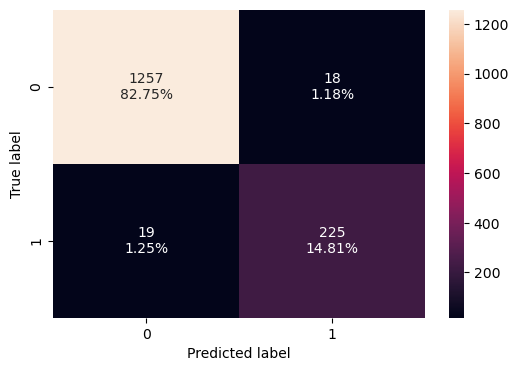

In [885]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_abc, X_test, y_test)

##### Observations:
AdaBoost Classifier is the best model for this case.  
The Recall and Accuracy has marginally decreased from the training set, but still not bad.  
The Precision and F1 scores have improved compared to the training set.  
The model is able to predict 83% of True positives and 15% True negatives correctly.  
The model has made a mistake in just ~1% of the predictions


### Feature Importances

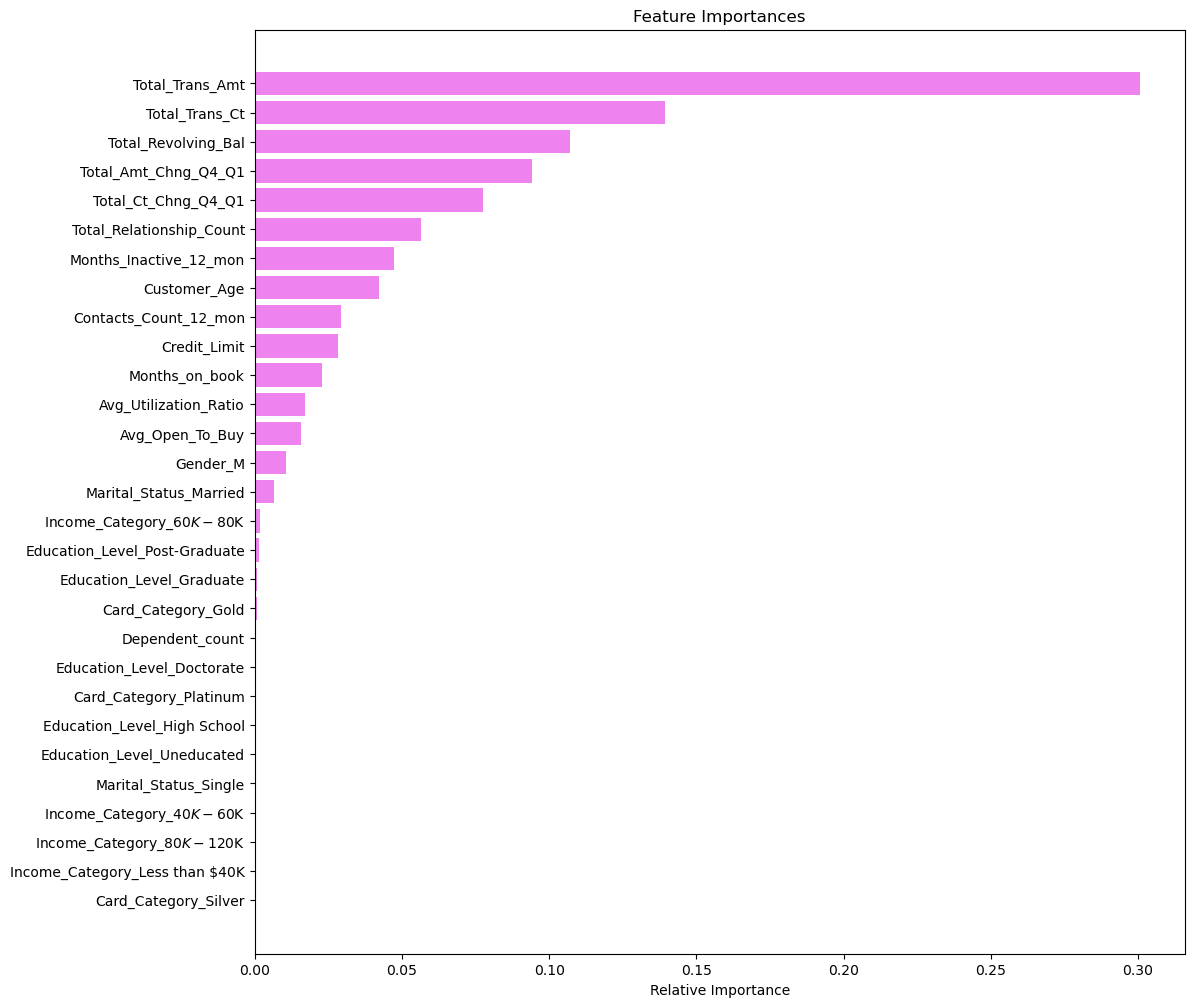

In [883]:
feature_names = X_train.columns
importances =  tuned_abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observations : Total Transaction Amount and Total Transaction Count are the two main features affecting the prediction

# Business Insights and Conclusions

1. The total transaction amount and total transaction count are important predictors for customer behavior.Customers with higher transaction count and who transact with higher amounts are less likely to attrite. Incentivizing customers to maintain high transaction amount and counts can help retain customers. Cash Back offers/Awarding points can help improve the transaction counts/amount.
2. Total Revolving Balance is an important feature in predicting attrition. Customers with a higher carry over balance from month to month are more likely to retain their accounts . Hence, programs to maintain higher revolving credit should be introduced.
3. Introducing new programs to enable customers to shop during the holiday season in Q4 can help retain them
4. Customers holding more products are more likely to retain the Credit Card accounts. More products implies better relations with the bank which leads to higher retention

***